In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
import os
import re
import seaborn as sns
warnings.filterwarnings("ignore")

C:\Users\aminm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
names = {"Farhad Abbasi": ["Iran", "male"],
         "Maryam Abbasi": ["Iran", "female"],
         "Haoyu Wang": ["China", "male"],
         "Yi-Nuo": ["China", "female"],
         "Max Müller": ["Germany", "male"],
         "Emilia Müller": ["Germany", "female"],
         "Peter Schmidt": [np.nan, np.nan]
        }

names_df = pd.DataFrame.from_dict(names, orient='index', columns=['Country', 'Gender'])


In [3]:
# Define the root directory containing the folders
root_directory = "C:/Users/aminm/OneDrive/Desktop/Uni MA Master/3. Semester/Team Project LLM/hubsim/parsing/output-04.03.2024/Open-Ended"

# List of folders to process
folders = ["Bagel-Bagel",
           "Bagel-Yi",
           "Yi-Bagel",
           "Yi-Yi"]

# Initialize an empty dictionary to store the DataFrames for each folder
folder_dfs = {}

# Iterate over each folder
for folder in folders:
    full_path = os.path.join(root_directory, folder)
    # Initialize an empty DataFrame for the current folder
    df = pd.DataFrame()
    # Iterate over each file in the current folder
    for name in os.listdir(full_path):
        # Extract experiment information from the file name
        experiment_info = re.findall(r"bagel-dpo-34b-v0.2|Yi-34B-Chat|Magdeburg|Duisburg|München|Emilia Müller|Max Müller|Maryam Abbasi|Farhad Abbasi|Yi-Nuo|Haoyu Wang|Germany|Iran|China?", name)
        model_landlord = experiment_info[0]
        renter_name = experiment_info[1]
        country = experiment_info[2]
        model_renter = experiment_info[3]
        city = experiment_info[4]
        # Read the CSV file into a DataFrame
        results = pd.read_csv(os.path.join(full_path, name), encoding='unicode_escape')
        # Modify the DataFrame as needed
        results["name"] = renter_name
        results["country"] = country
        results["gender"] = "male"
        results.loc[results["Name"] == "Peter Schmidt from Germany", 'name'] = "Peter Schmidt"
        results.loc[results["name"].isin(["Emilia Müller", "Maryam Abbasi", "Yi-Nuo"]), 'gender'] = "female"
        results["city"] = city
        results["model_renter"] = model_renter
        results["model_landlord"] = model_landlord
        results["cross_model"] = model_landlord.split("-", 1)[0].capitalize() + " - " + model_renter.split("-", 1)[0].capitalize()
        results["cross_model"] = results["cross_model"].str.replace("B", "b")
        # Concatenate the results to the current folder's DataFrame
        df = pd.concat([df, results], ignore_index=True)
        print(f"Appended {name} successfully to DataFrame for folder {folder}")

    # Store the DataFrame for the current folder in the dictionary
    folder_dfs[folder] = df

# Display the DataFrames for each folder
for folder, df in folder_dfs.items():
    print(f"DataFrame for folder {folder}:")
    print(df)


Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-Duisburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-Magdeburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-München-20240229.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-Duisburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-Magdeburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-München-20240229.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Haoyu Wang from China-bagel-dpo-34b-v0.2-Duisbur

In [4]:
df_all = pd.concat([folder_dfs[crossm] for crossm in folders])

In [5]:
df_all

,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,1500.0,1600.0,1550.000000,1600.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"1500.0, 1600.0","[1500.0, 1600.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
1,50,Peter Schmidt from Germany,1700.0,2000.0,1833.333333,1700.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"2000.0, 1800.0, 1700.0","[2000.0, 1800.0, 1700.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
2,50,Emilia Müller from Germany,450.0,1000.0,695.000000,450.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1000.0, 900.0, 1100.0, 800.0, 1000.0, 750.0, 9...","[1000.0, 900.0, 800.0, 750.0, 700.0, 600.0, 70...",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
3,50,Peter Schmidt from Germany,400.0,1500.0,955.000000,400.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1500.0, 1400.0, 1200.0, 900.0, 1100.0, 1000.0,...","[1500.0, 1400.0, 1200.0, 1100.0, 1000.0, 900.0...",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
4,50,Emilia Müller from Germany,500.0,700.0,616.666667,700.0,1dd98196-650d-4f07-a4e4-028eec038529,5,"500.0, 650.0, 700.0","[500.0, 650.0, 700.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,50,Peter Schmidt from Germany,425.0,900.0,716.666667,425.0,eba79ea0-5025-45ef-b7e9-9e8afe023622,8,"800.0, 900.0, 850.0, 850.0, 425.0, 850.0, 850....","[900.0, 850.0, 850.0, 425.0, 850.0, 425.0]",Peter Schmidt,China,male,München,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
798,50,Yi-Nuo Wang from China,1500.0,1700.0,1600.000000,1700.0,eef847b9-3014-4886-be7a-0b4eae4aaf01,5,"1500.0, 1600.0, 1750.0, 1700.0","[1500.0, 1600.0, 1700.0]",Yi-Nuo,China,female,München,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
799,50,Peter Schmidt from Germany,1500.0,1750.0,1650.000000,1700.0,eef847b9-3014-4886-be7a-0b4eae4aaf01,5,"1500.0, 1600.0, 1750.0, 1700.0, 1700.0","[1500.0, 1750.0, 1700.0]",Peter Schmidt,China,male,München,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
800,50,Yi-Nuo Wang from China,800.0,875.0,841.666667,875.0,fcd3ef2d-0a07-4fbf-9c13-a4f5d25afb67,7,"800.0, 900.0, 850.0, 875.0","[800.0, 850.0, 875.0]",Yi-Nuo,China,female,München,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi


In [6]:
display(folder_dfs["Bagel-Bagel"].head())
display(folder_dfs["Bagel-Yi"].head())
display(folder_dfs["Yi-Bagel"].head())
display(folder_dfs["Yi-Yi"].head())

,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,1500.0,1600.0,1550.000000,1600.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"1500.0, 1600.0","[1500.0, 1600.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
1,50,Peter Schmidt from Germany,1700.0,2000.0,1833.333333,1700.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"2000.0, 1800.0, 1700.0","[2000.0, 1800.0, 1700.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
2,50,Emilia Müller from Germany,450.0,1000.0,695.000000,450.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1000.0, 900.0, 1100.0, 800.0, 1000.0, 750.0, 9...","[1000.0, 900.0, 800.0, 750.0, 700.0, 600.0, 70...",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
3,50,Peter Schmidt from Germany,400.0,1500.0,955.000000,400.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1500.0, 1400.0, 1200.0, 900.0, 1100.0, 1000.0,...","[1500.0, 1400.0, 1200.0, 1100.0, 1000.0, 900.0...",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
4,50,Emilia Müller from Germany,500.0,700.0,616.666667,700.0,1dd98196-650d-4f07-a4e4-028eec038529,5,"500.0, 650.0, 700.0","[500.0, 650.0, 700.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,1700.0,1760.0,1740.000000,1740.0,115b3d73-f5f7-403d-92c2-1a24fecb6fea,10,"1700.0, 1750.0, 1750.0, 1760.0, 1740.0","[1700.0, 1750.0, 1750.0, 1760.0, 1740.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
1,50,Peter Schmidt from Germany,1740.0,3480.0,2048.571429,3480.0,115b3d73-f5f7-403d-92c2-1a24fecb6fea,10,"2000.0, 1800.0, 1780.0, 1780.0, 1760.0, 1740.0...","[2000.0, 1800.0, 1780.0, 1780.0, 1760.0, 1740....",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
2,50,Emilia Müller from Germany,900.0,1100.0,1016.666667,1000.0,2f5f421c-e804-4b6d-ba95-f1c224331152,10,"1200.0, 900.0, 1050.0, 1000.0, 1100.0, 1050.0,...","[900.0, 1050.0, 1000.0, 1100.0, 1050.0, 1000.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
3,50,Peter Schmidt from Germany,1050.0,1200.0,1078.571429,1050.0,2f5f421c-e804-4b6d-ba95-f1c224331152,9,"1200.0, 900.0, 1050.0, 1050.0, 1000.0, 1100.0,...","[1200.0, 1050.0, 1050.0, 1100.0, 1050.0, 1050....",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
4,50,Emilia Müller from Germany,0.0,0.0,0.000000,0.0,35f2f5e2-0de9-47c8-9f01-fe95e06c78e0,1,NaN,[],Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,500.0,575.0,550.000000,575.0,062e86ef-4d1b-41d3-aabc-8784d03de817,5,"500.0, 550.0, 575.0, 575.0","[500.0, 550.0, 575.0, 575.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
1,50,Peter Schmidt from Germany,500.0,600.0,558.333333,575.0,062e86ef-4d1b-41d3-aabc-8784d03de817,4,"500.0, 550.0, 600.0, 575.0","[500.0, 600.0, 575.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
2,50,Emilia Müller from Germany,500.0,700.0,620.000000,700.0,06cd7814-3bf2-4d6e-bb1e-b160d24af278,6,"500.0, 600.0, 650.0, 650.0, 700.0","[500.0, 600.0, 650.0, 650.0, 700.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
3,50,Peter Schmidt from Germany,700.0,800.0,750.000000,750.0,06cd7814-3bf2-4d6e-bb1e-b160d24af278,6,"800.0, 600.0, 700.0, 650.0, 750.0, 750.0, 750.0","[800.0, 700.0, 750.0, 750.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
4,50,Emilia Müller from Germany,500.0,675.0,595.000000,675.0,07092acc-1289-4c64-9ad2-9b3f7ef48614,6,"500.0, 550.0, 600.0, 650.0, 675.0","[500.0, 550.0, 600.0, 650.0, 675.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,850.0,850.00,850.000000,850.0,01fabcd5-6c93-45eb-abac-b40f42bbfe3b,6,"850.0, 750.0, 850.0","[850.0, 850.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
1,50,Peter Schmidt from Germany,850.0,850.00,850.000000,850.0,01fabcd5-6c93-45eb-abac-b40f42bbfe3b,5,"850.0, 750.0, 850.0","[850.0, 850.0]",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
2,50,Emilia Müller from Germany,800.0,900.00,866.666667,900.0,196049f4-30ec-4087-819c-e4426a4e141c,9,"800.0, 900.0, 900.0","[800.0, 900.0, 900.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
3,50,Peter Schmidt from Germany,900.0,1000.00,933.333333,900.0,196049f4-30ec-4087-819c-e4426a4e141c,8,"800.0, 1000.0, 900.0, 900.0","[1000.0, 900.0, 900.0]",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
4,50,Emilia Müller from Germany,4.0,693.75,542.050000,4.0,2d43c1bd-9e44-4f22-9b6e-a365cbca6453,9,"650.0, 675.0, 700.0, 687.5, 693.75, 4.0","[650.0, 675.0, 687.5, 693.75, 4.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi


In [7]:
display(folder_dfs["Bagel-Bagel"].shape)
display(folder_dfs["Bagel-Yi"].shape)
display(folder_dfs["Yi-Bagel"].shape)
display(folder_dfs["Yi-Yi"].shape)

(718, 17)

(806, 17)

(846, 17)

(802, 17)

In [8]:
df_all["cross_model"].value_counts()

Yi - bagel       846
bagel - Yi       806
Yi - Yi          802
bagel - bagel    718
Name: cross_model, dtype: int64

In [9]:
def plot_country(data, column, city):
    data_filtered = data[(data["city"] == city) & (data["name"] != "Peter Schmidt")]
    data_filtered["Name_Country"] = data_filtered["name"] + " " + "(" + data_filtered["country"] + ")"
    
    plt.figure(figsize=(30, 16))
    sns.boxplot(x="Name_Country", y=column, #hue="city", 
                dodge=True, data=data_filtered)

    plt.title(f"{column} by nationality for apartment in {city}", fontsize=40)
    plt.suptitle(f"Landlord: {data['model_landlord'].mode()[0].split('-')[0]} - Renter: {data['model_renter'].mode()[0].split('-')[0]}", fontsize=30)
    plt.ylim(0, 2000)
    #if city == "New York":
    #   plt.ylim(0, 3000)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.xlabel("")
    plt.ylabel(f"{column} in €", fontsize=20)
    plt.legend(prop={'size': 25})

    plt.tight_layout()
    plt.savefig(f"plot_{column}_{city}")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


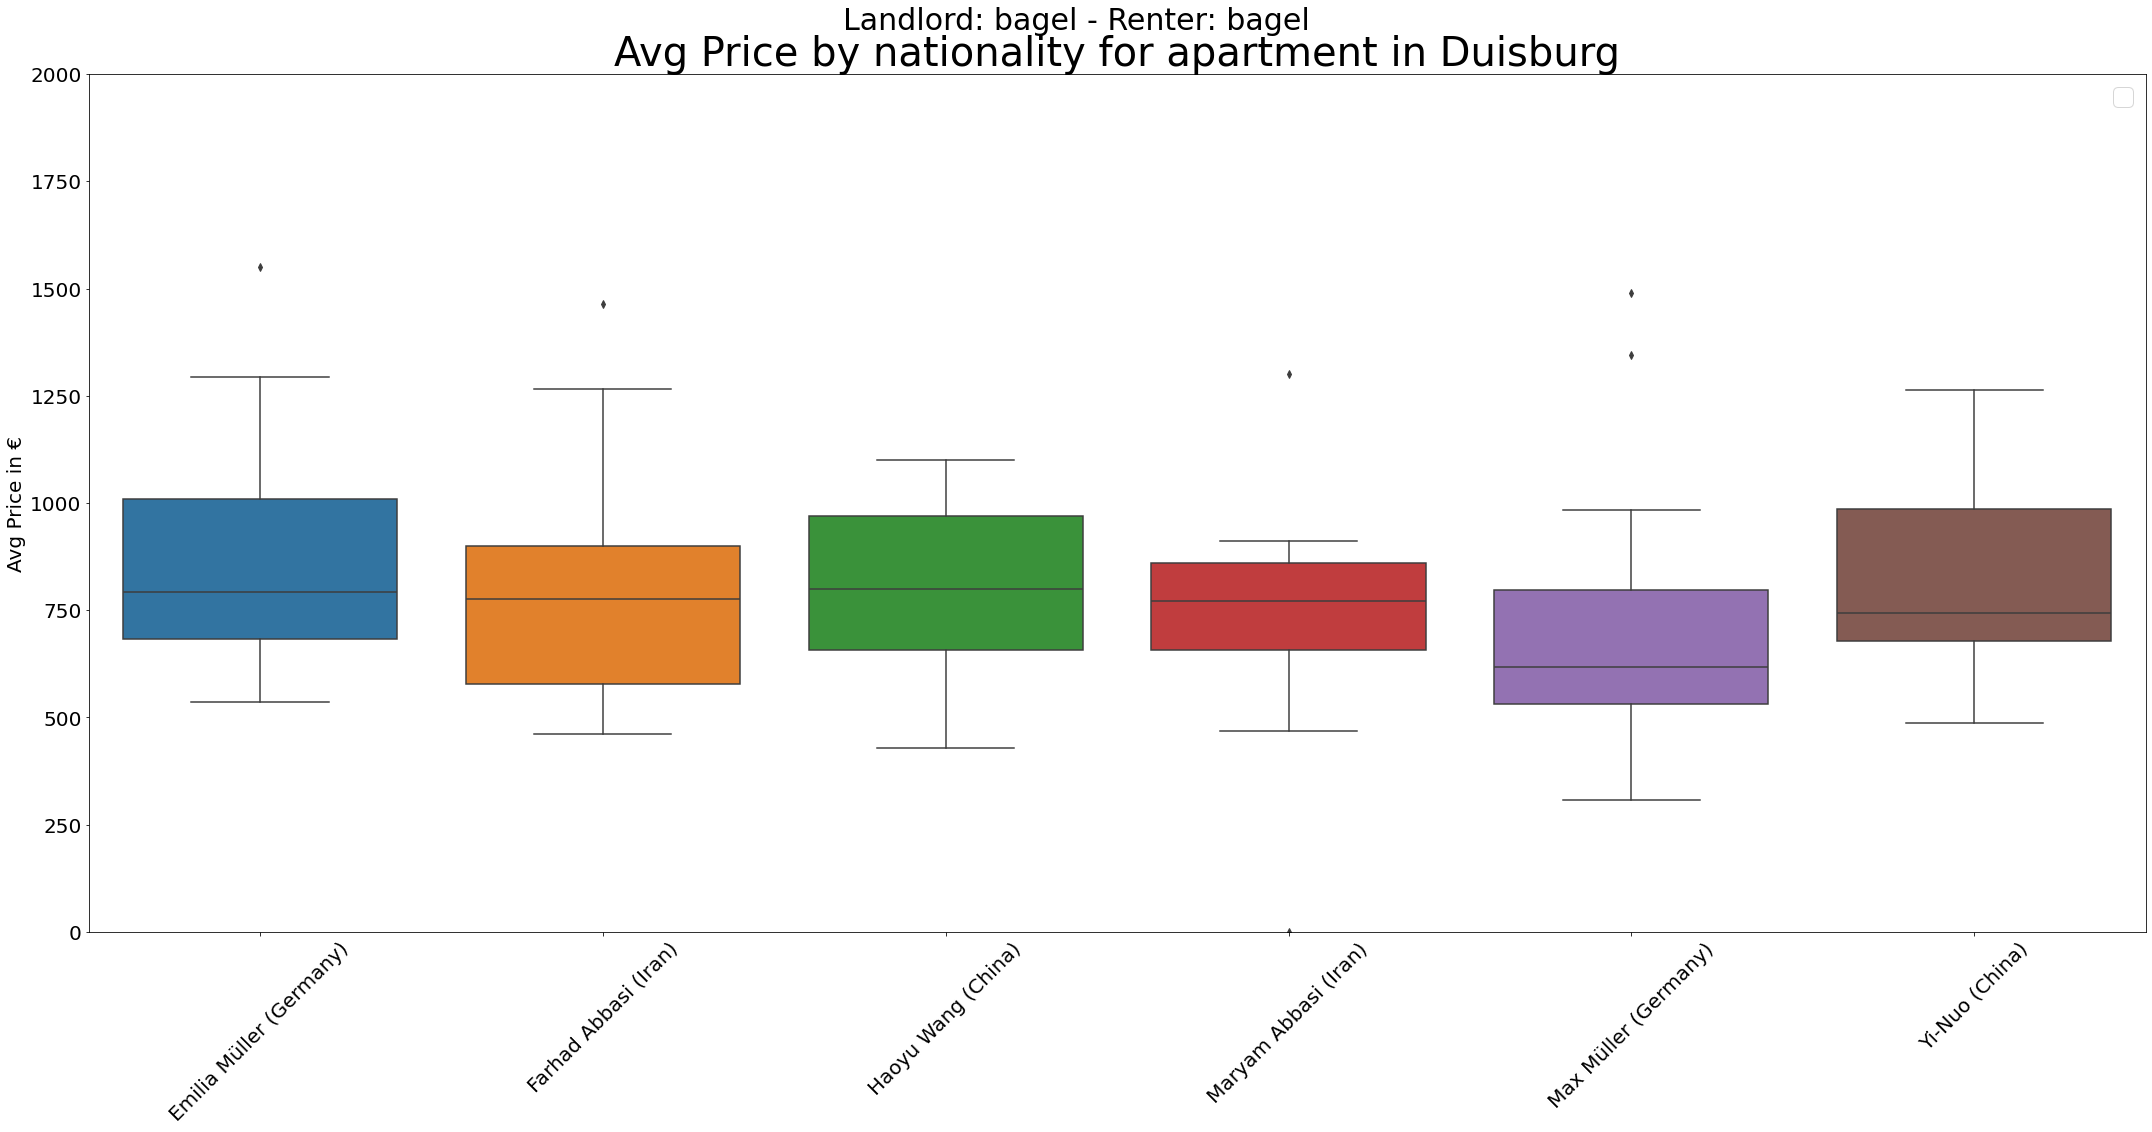

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


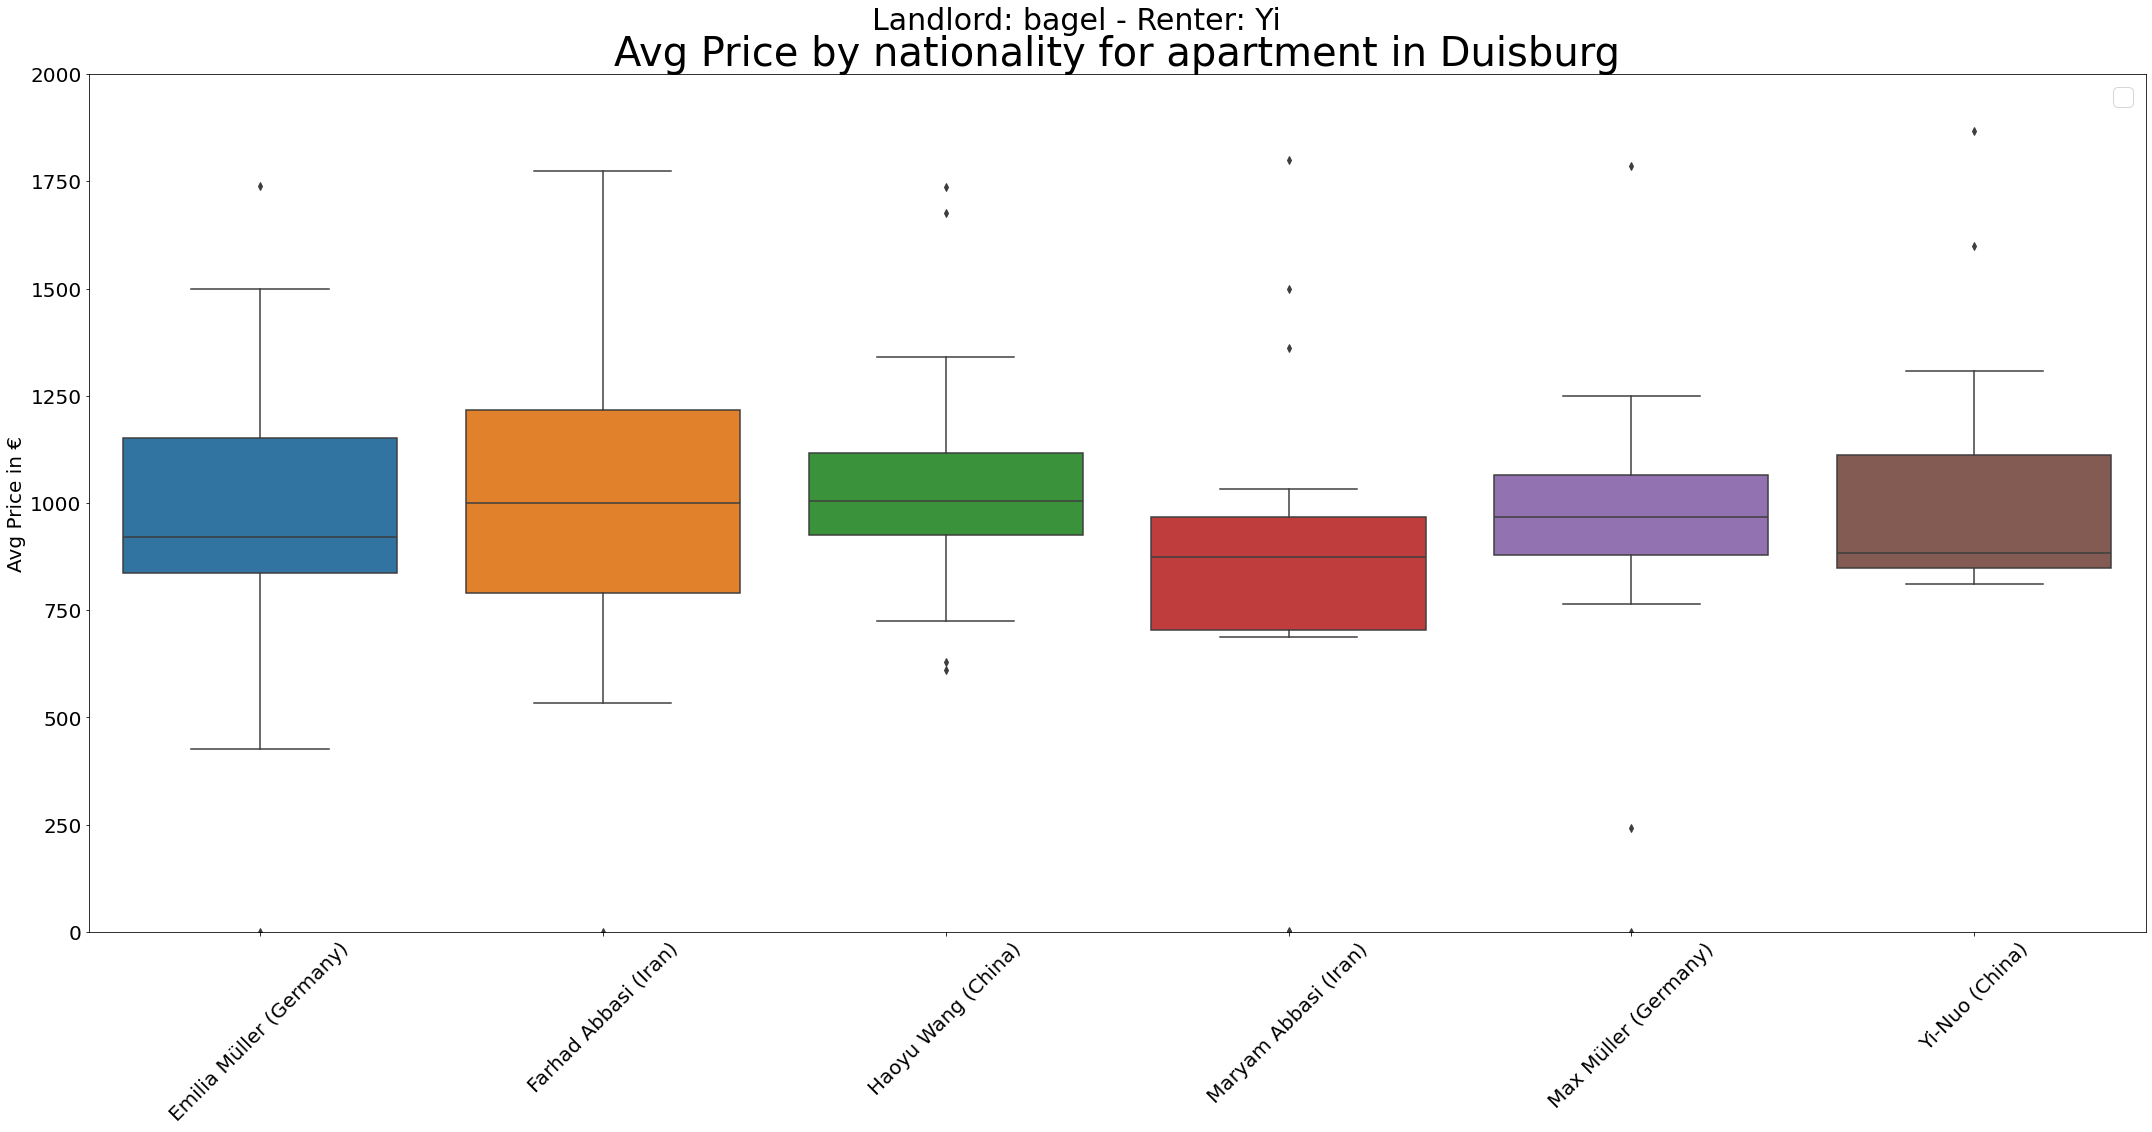

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


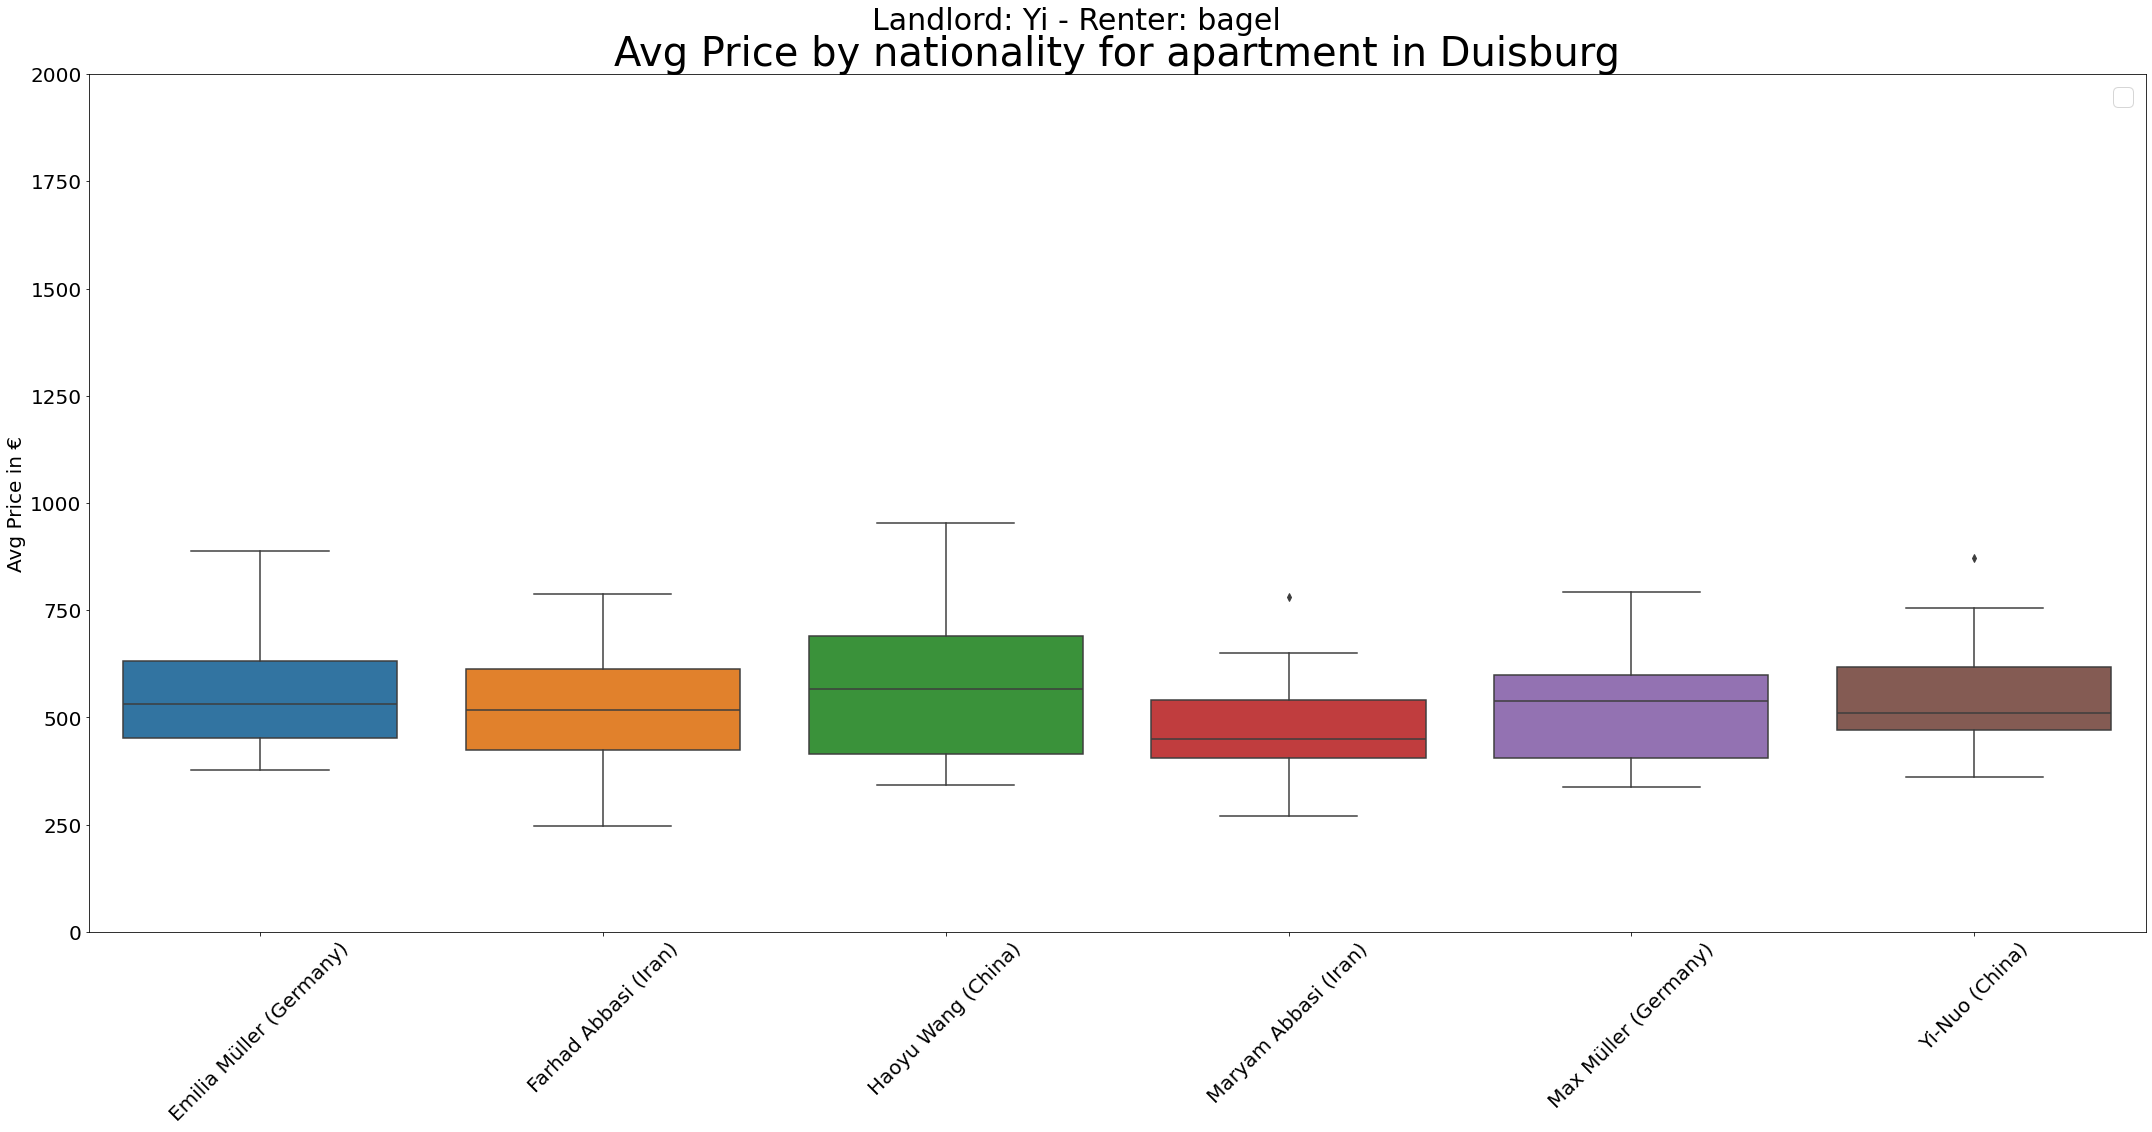

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


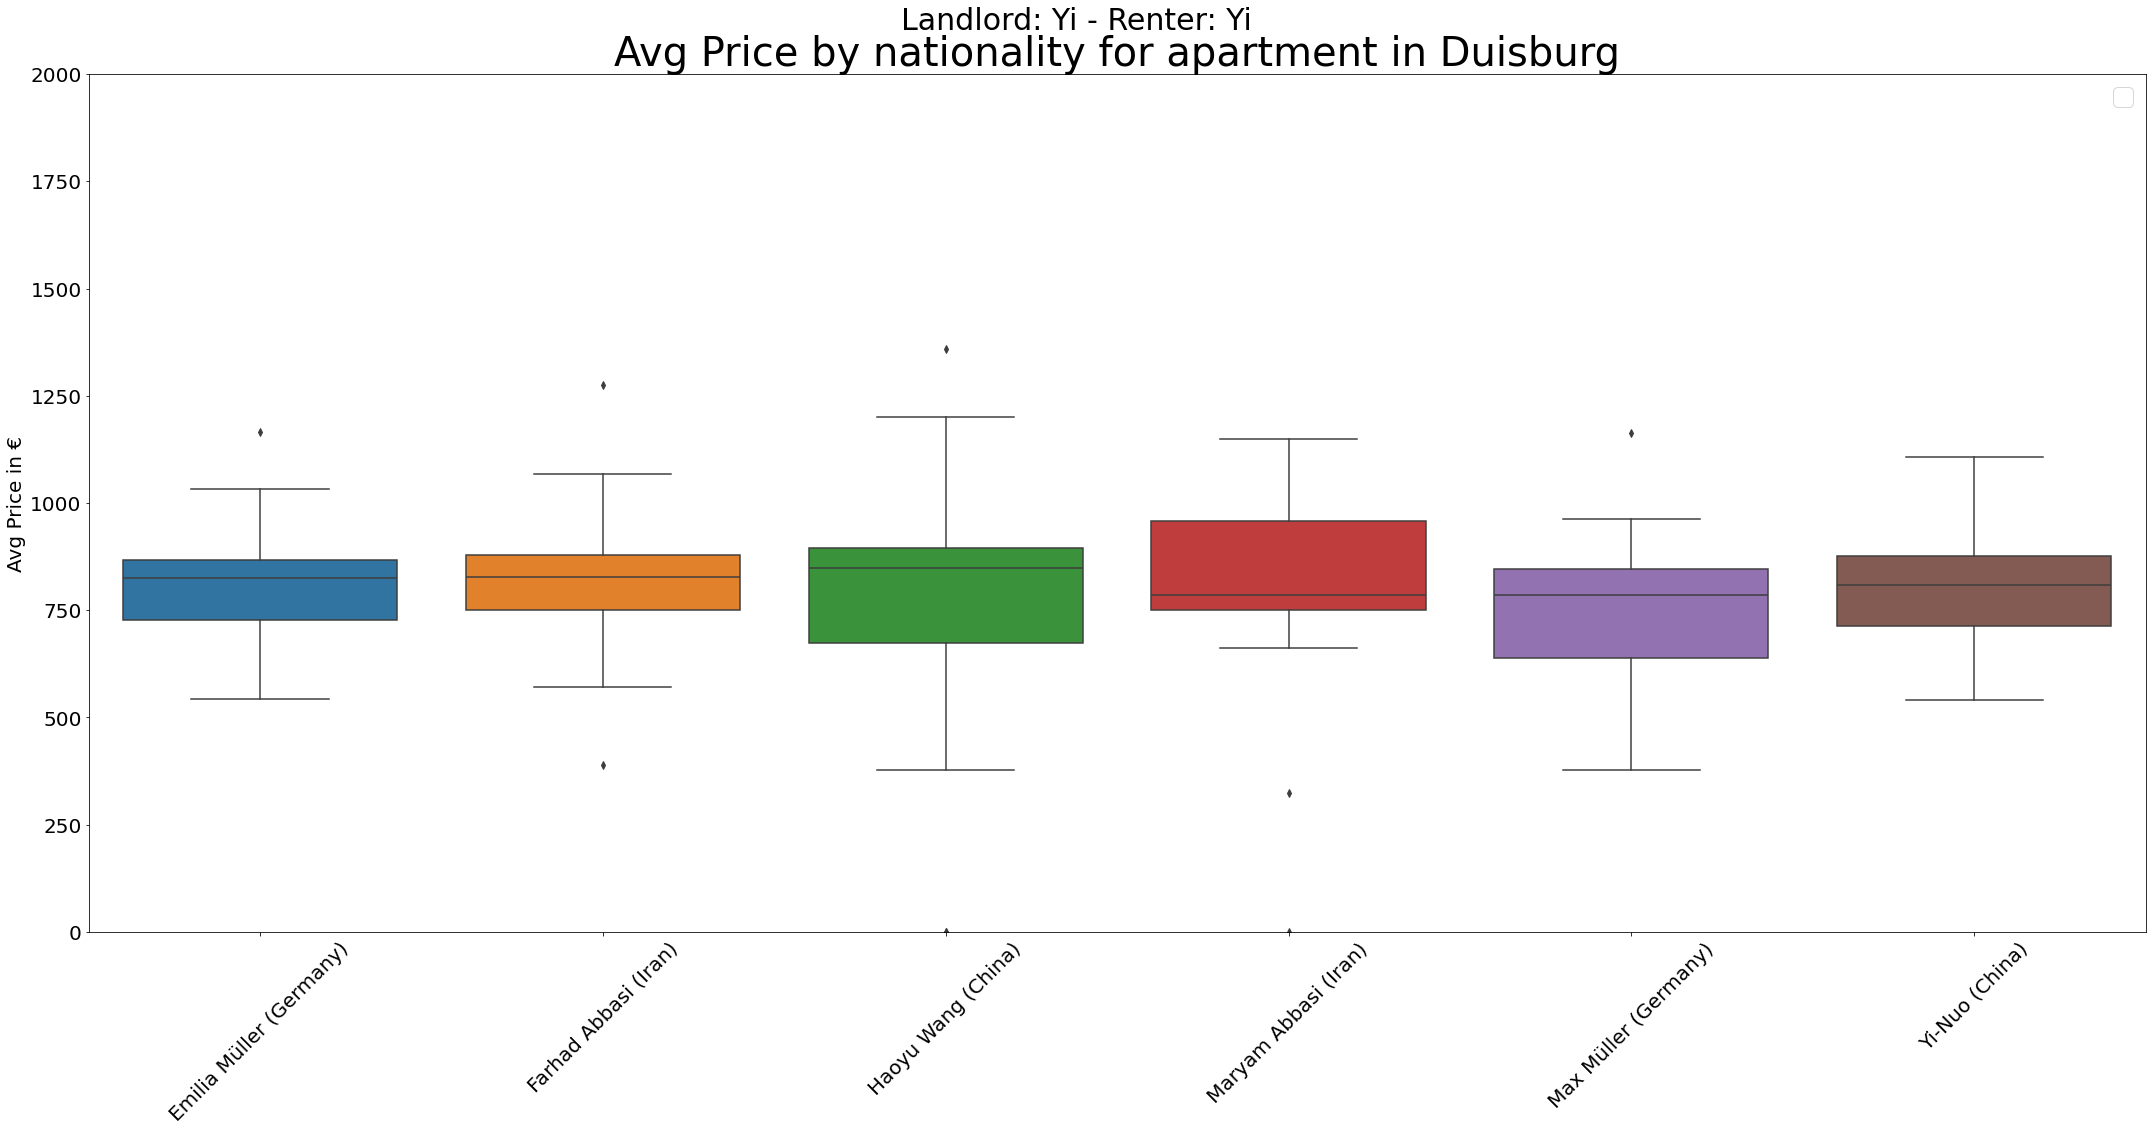

In [10]:
for df in folder_dfs.values():
    plot_country(df, column="Avg Price", city="Duisburg")

In [11]:
# create df without landlord Peter Schmidt
df_all_renter = df_all[df_all["name"] != "Peter Schmidt"] 
df_all_landlord = df_all[df_all["name"] == "Peter Schmidt"] 

In [12]:
df_all_renter.loc[df_all_renter["Avg Price"] <= 10, "Avg Price"] = np.nan

In [13]:
df_all_renter.groupby("city")["Avg Price"].mean()

city
Duisburg     788.242075
Magdeburg    696.033846
München      961.611771
Name: Avg Price, dtype: float64

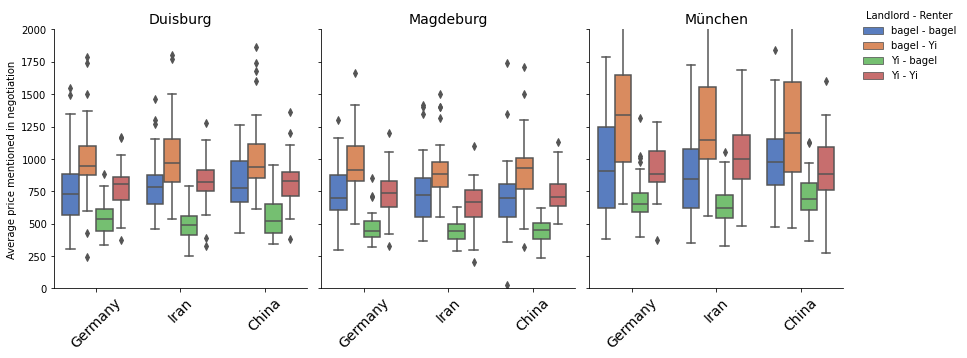

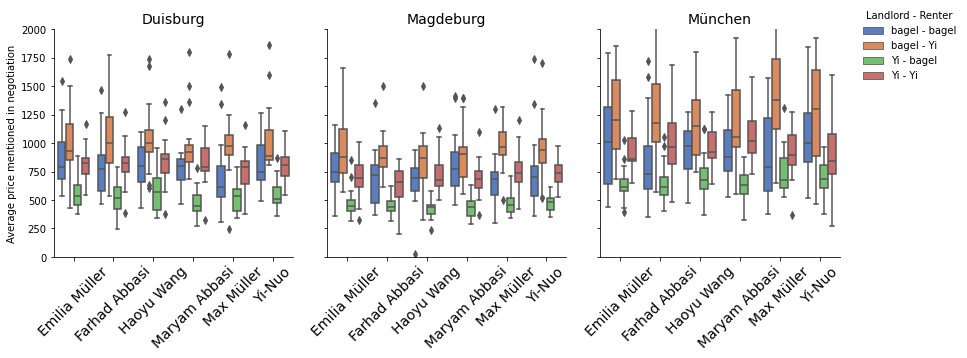

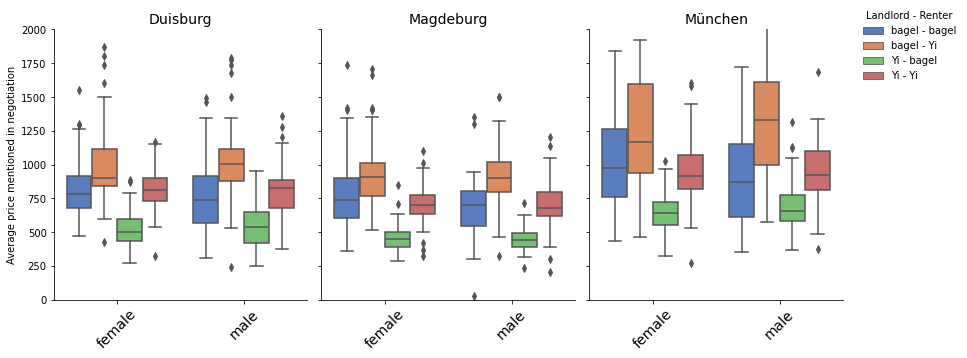

In [14]:
for var in ["country", "name", "gender"]:

    city_model_gender_box = sns.catplot(x=var, 
                                 y="Avg Price", 
                                 hue="cross_model", 
                                 col="city", 
                                 kind="box", 
                                 data=df_all_renter,
                                 col_wrap=3,
                                 palette="muted",
                                 height=5,
                                 aspect=0.7,
                                 legend_out=True)

    city_model_gender_box.set(ylim = (0,2000), ylabel="Average price mentioned in negotiation")

    sns.move_legend(city_model_gender_box, "upper left", bbox_to_anchor=(1, 1), title="Landlord - Renter")

#     plt.xlabel("")
#     for ax in city_model_gender_box.axes.flat:
#         ax.tick_params(axis='x', labelrotation=45, labelsize=14)
#         ax.set_xlabel("")
        
    for ax, title in zip(city_model_gender_box.axes.flat, ["Duisburg", "Magdeburg", "München"]):
        ax.tick_params(axis='x', labelrotation=45, labelsize=14)
        ax.set_xlabel("")
        ax.set_title(title, fontsize=14)

#     plt.suptitle("Average discussed prices by gender")
    plt.tight_layout()
    plt.savefig(f"{var}_box.png", bbox_inches='tight')


    plt.show()

In [15]:
split_values = df_all['Modified Price List'].str.split(', ', expand=True).iloc[:, :4].apply(lambda x: x.str.replace('[\[\]]', ''))
df_all[['Offer1', 'Offer2', 'Offer3', 'Offer4']] = split_values

In [16]:
df_all["Position"] = df_all["name"].apply(lambda x: "Renter" if x != "Peter Schmidt" else "Landlord")

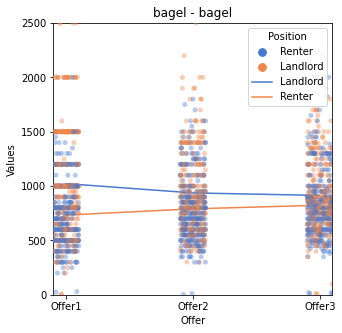

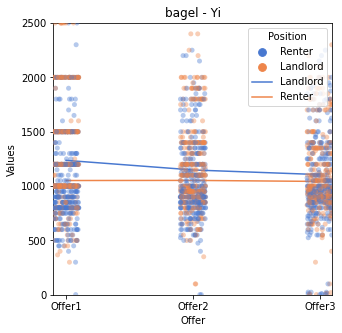

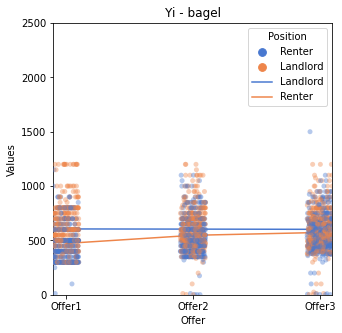

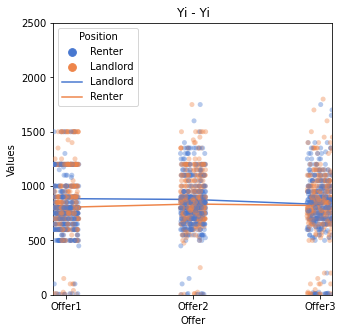

In [17]:
for cross_model in df_all["cross_model"].unique():
    df_melted = pd.melt(df_all[["name", "Position", "cross_model", "Offer1", "Offer2", "Offer3"]], id_vars=["Position", "name", "cross_model"], var_name='Offer', value_name='Values')
    df_melted.replace({None: np.nan}, inplace=True)
    df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')
    df_melted = df_melted[(df_melted["Values"] <= 4000) & (df_melted["cross_model"] == cross_model)]

    grouped = df_melted.groupby(["Position", "Offer"])["Values"].mean()

    fig = plt.figure(figsize=(5,5))
    sns.stripplot(x='Offer', y='Values', hue="Position", data=df_melted, palette="muted", alpha=0.4)
    sns.lineplot(x='Offer', y=grouped.values, hue="Position", data=grouped, palette="muted")
    plt.ylim(0,2500)
    plt.title(cross_model)

In [18]:
df_melted_diff = pd.melt(df_all[["name", "Position", "cross_model", "Offer1", "Offer2", "Offer3"]], id_vars=["name", "Position", "cross_model"], var_name='Offer', value_name='Values')
df_melted_diff.replace({None: np.nan}, inplace=True)
df_melted_diff['Values'] = pd.to_numeric(df_melted_diff['Values'], errors='coerce')
df_melted_diff = df_melted_diff[df_melted_diff["Values"] <= 4000]

grouped_diff = df_melted_diff.groupby(["Position", "cross_model", "Offer"])["Values"].mean()

In [19]:
differences = abs(grouped_diff.groupby(["cross_model", "Offer"]).diff())[12:]

In [20]:
differences

Position  cross_model    Offer 
Renter    Yi - Yi        Offer1     79.299480
                         Offer2     42.027908
                         Offer3     10.347769
          Yi - bagel     Offer1    133.257683
                         Offer2     57.065463
                         Offer3     29.068888
          bagel - Yi     Offer1    185.426422
                         Offer2     96.042326
                         Offer3     62.854967
          bagel - bagel  Offer1    289.229990
                         Offer2    146.281701
                         Offer3     90.386078
Name: Values, dtype: float64

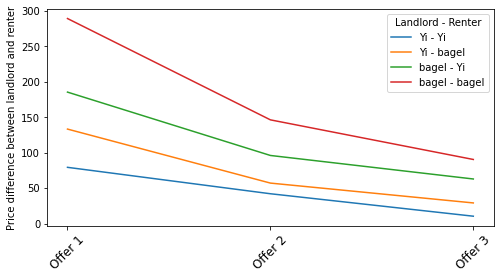

In [21]:
fig, ax = plt.subplots(figsize=(8,4))

differences.unstack("cross_model").plot(kind="line", ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(["Offer 1", "Offer 2", "Offer 3"], fontsize=12, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Price difference between landlord and renter")
plt.legend(title="Landlord - Renter", fontsize=10)

plt.savefig("price_differences.png", bbox_inches='tight')
plt.show()

# Interview data

In [22]:
folder_path = "C:/Users/aminm/OneDrive/Desktop/Uni MA Master/3. Semester/Team Project LLM/hubsim/parsing/output-03072024"

# List to store DataFrames for each CSV file
dfs = []

# Iterate over each file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, file)
        # Read the CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [23]:
combined_df

,Unnamed: 0,answer_name,answer_agreement,answer_price,answer_likability,answer_discrimination,answer_text_discrimination,city,model_landlord,model_renter,renter_name,experiment_id,interview_partner,answer_conversation_partner,correct_character
0,0,Peter Schmidt,Yes,740,10.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,Emilia Müller,22963780-cd3b-453f-afb4-b8d6abdd09ea,landlord,Emilia Müller,1.0
1,1,Emilia Müller,Yes,740,10.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,Emilia Müller,22963780-cd3b-453f-afb4-b8d6abdd09ea,renter,Peter Schmidt,1.0
2,2,Peter Schmidt,Yes,875,8.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,Emilia Müller,2b711fd6-d419-44e7-a1e2-b6bd89ce9274,landlord,Emilia Müller,1.0
3,3,Emilia Müller,Yes,875,9.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,Emilia Müller,2b711fd6-d419-44e7-a1e2-b6bd89ce9274,renter,Peter Schmidt,1.0
4,4,Peter Schmidt,Yes,900,7.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,Emilia Müller,317c8997-7846-4411-8840-ba0136107a13,landlord,Emilia Müller,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,848,Yi-Nuo,Yes,1100,10.0,No,NaN,München,Yi-34B-Chat,Yi-34B-Chat,Yi-Nuo,f30ee210-9311-4b87-a929-e5da0bb1bb08,renter,Peter Schmidt,1.0
3495,849,Yi-Nuo,Yes,850,9.0,No,NaN,München,Yi-34B-Chat,Yi-34B-Chat,Yi-Nuo,f57f49e0-8a9f-4977-968d-448a5b6f9c71,landlord,Peter Schmidt,0.0
3496,850,Yi-Nuo,Yes,850,8.0,No,NaN,München,Yi-34B-Chat,Yi-34B-Chat,Yi-Nuo,f57f49e0-8a9f-4977-968d-448a5b6f9c71,renter,Null,1.0
3497,851,Peter Schmidt,Yes,1.050,7.0,No,NaN,München,Yi-34B-Chat,Yi-34B-Chat,Yi-Nuo,f59976fc-dd78-4126-b7c5-d003b20e2d19,landlord,Yi-Nuo,1.0


In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3499 non-null   int64  
 1   answer_name                  3499 non-null   object 
 2   answer_agreement             3499 non-null   object 
 3   answer_price                 3499 non-null   object 
 4   answer_likability            3499 non-null   object 
 5   answer_discrimination        3499 non-null   object 
 6   answer_text_discrimination   0 non-null      float64
 7   city                         3499 non-null   object 
 8   model_landlord               3499 non-null   object 
 9   model_renter                 3499 non-null   object 
 10  renter_name                  3499 non-null   object 
 11  experiment_id                3499 non-null   object 
 12  interview_partner            3499 non-null   object 
 13  answer_conversatio

In [25]:
combined_df.groupby("interview_partner")["answer_name"].value_counts()

interview_partner  answer_name  
landlord           Peter Schmidt    1686
                   Yi-Nuo             11
                   Emilia Müller       2
                   Null                2
                   Haoyu Wang          1
renter             Maryam Abbasi     299
                   Emilia Müller     298
                   Haoyu Wang        298
                   Yi-Nuo            298
                   Max Müller        293
                   Farhad Abbasi     283
                   Peter Schmidt      17
                   Null               11
Name: answer_name, dtype: int64

In [26]:
combined_df["cross_model"] = combined_df["model_landlord"].str.split("-", 1).str[0].str.capitalize() + " - " + combined_df["model_renter"].str.split("-", 1).str[0].str.capitalize()
combined_df["cross_model"] = combined_df["cross_model"].str.replace("B", "b") 


In [27]:
combined_df["cross_model"]

0       bagel - bagel
1       bagel - bagel
2       bagel - bagel
3       bagel - bagel
4       bagel - bagel
            ...      
3494          Yi - Yi
3495          Yi - Yi
3496          Yi - Yi
3497          Yi - Yi
3498          Yi - Yi
Name: cross_model, Length: 3499, dtype: object

In [28]:
combined_df["answer_name"].value_counts()

Peter Schmidt    1703
Yi-Nuo            309
Emilia Müller     300
Haoyu Wang        299
Maryam Abbasi     299
Max Müller        293
Farhad Abbasi     283
Null               13
Name: answer_name, dtype: int64

In [29]:
combined_df["answer_name"] = combined_df["answer_name"].replace("Null", np.nan)

In [30]:
combined_df["country"] = combined_df["answer_name"].apply(lambda x: names.get(x, [None, None])[0])
combined_df["gender"] = combined_df["answer_name"].apply(lambda x: names.get(x, [None, None])[1])

In [31]:
combined_df["answer_agreement"].value_counts()

Yes     1949
No      1360
Null     186
N          4
Name: answer_agreement, dtype: int64

In [32]:
combined_df["answer_agreement_n"] = combined_df["answer_agreement"].map({"Yes":1, "No":0, "Null":np.nan, "N":np.nan})

In [33]:
combined_df["answer_price"].value_counts().sort_index()

1           2
1.000      13
1.025       2
1.050      25
1.075       3
         ... 
977         1
980         7
985         2
990         1
Null     1028
Name: answer_price, Length: 213, dtype: int64

In [34]:
combined_df["answer_price_n"] = combined_df["answer_price"].replace("Null", np.nan).astype(float)
combined_df.loc[(combined_df["answer_price_n"] <= 10) | (combined_df["answer_price_n"] >= 5000), "answer_price_n"] = np.nan

# sort out prices under 10 and over 5000 euros

In [35]:
combined_df["answer_price_n"].value_counts().sort_index().tail(20)

1550.0     1
1600.0     4
1625.0     2
1650.0     1
1675.0     1
1700.0     5
1750.0     3
1800.0    10
1821.0     1
1835.0     1
1850.0     2
1865.0     2
1900.0     2
1925.0     1
1950.0     2
2000.0     9
2250.0     1
2300.0     1
2350.0     2
2500.0     1
Name: answer_price_n, dtype: int64

In [36]:
combined_df["answer_likability"].value_counts().sort_index()

1.0        109
10.0       426
1000.0       1
1200.0       1
1350.0       1
1425.0       2
1450.0       1
1750.0       1
2.0          6
3.0          9
495.0        1
5.0        117
575.0        2
595.0        1
6.0         43
600.0        4
625.0        1
650.0        3
690.0        1
7.0       1034
700.0        4
710.0        1
720.0        1
750.0        1
8.0        798
800.0        2
825.0        1
850.0        1
875.0        1
9.0        275
900.0        3
925.0        1
950.0        1
975.0        1
987.0        1
Null       643
Name: answer_likability, dtype: int64

In [37]:
combined_df["answer_likability_n"] = pd.to_numeric(combined_df["answer_likability"], errors='coerce')
combined_df["answer_likability_n"] = combined_df["answer_likability_n"].where(combined_df["answer_likability_n"].between(1, 10))

# replace Null and filter out any numbers not between 1 and 10

In [38]:
combined_df["answer_discrimination"].value_counts()

No      3222
Null     251
Yes       18
N          8
Name: answer_discrimination, dtype: int64

In [39]:
combined_df[combined_df["answer_discrimination"] == "Yes"][["answer_name", "answer_discrimination", "answer_likability", "answer_agreement","cross_model", "experiment_id"]]

,answer_name,answer_discrimination,answer_likability,answer_agreement,cross_model,experiment_id
422,Peter Schmidt,Yes,Null,Yes,bagel - bagel,9b81f17b-37c7-42de-b7c5-829a0c1ef94b
568,Maryam Abbasi,Yes,2.0,No,bagel - bagel,647c30a0-f32d-4aa7-aff6-8286f0b5e07b
723,Max Müller,Yes,10.0,Yes,bagel - bagel,716a7acd-bbbe-41c9-8c01-2b655d2ff309
785,Yi-Nuo,Yes,Null,Yes,bagel - bagel,cfb5dda7-c4b3-413c-bd87-30db65fe9dfd
1004,Emilia Müller,Yes,Null,No,bagel - Yi,64d9bb79-c6f8-4640-9595-cd99b9b885f6
1006,Emilia Müller,Yes,1.0,No,bagel - Yi,6961b4f4-3407-45b2-9ce0-72e26ec61463
1029,Emilia Müller,Yes,1.0,No,bagel - Yi,e9384234-9f04-404b-96c4-0a221d2a5403
1053,Peter Schmidt,Yes,9.0,Yes,bagel - Yi,3389a622-35a0-458c-a4c1-48028353d619
1097,Farhad Abbasi,Yes,1.0,Yes,bagel - Yi,3baff185-8a9d-471b-8c4f-526f50715d03
1127,Farhad Abbasi,Yes,1.0,Yes,bagel - Yi,ce332f1f-0f94-4700-a092-09c71ec56e97


In [40]:
combined_df["answer_discrimination_n"] = combined_df["answer_discrimination"].map({"Yes":1, "No":0, "Null":np.nan, "N":np.nan})

In [41]:
combined_df["answer_text_discrimination"].value_counts()

Series([], Name: answer_text_discrimination, dtype: int64)

In [42]:
combined_df["interview_partner"].value_counts()

renter      1797
landlord    1702
Name: interview_partner, dtype: int64

In [43]:
combined_df.describe()

,Unnamed: 0,answer_text_discrimination,correct_character,answer_agreement_n,answer_price_n,answer_likability_n,answer_discrimination_n
count,3499.000000,0.0,3499.000000,3309.00000,2245.000000,2817.000000,3240.000000
mean,437.134324,NaN,0.986853,0.58900,799.594655,7.578275,0.005556
std,253.003286,NaN,0.113919,0.49209,279.247420,1.838566,0.074340
min,0.000000,NaN,0.000000,0.00000,100.000000,1.000000,0.000000
25%,218.000000,NaN,1.000000,0.00000,600.000000,7.000000,0.000000
50%,437.000000,NaN,1.000000,1.00000,750.000000,8.000000,0.000000
75%,655.500000,NaN,1.000000,1.00000,900.000000,8.000000,0.000000
max,897.000000,NaN,1.000000,1.00000,2500.000000,10.000000,1.000000


In [44]:
combined_df[combined_df["interview_partner"] == "renter"].describe()

,Unnamed: 0,answer_text_discrimination,correct_character,answer_agreement_n,answer_price_n,answer_likability_n,answer_discrimination_n
count,1797.000000,0.0,1797.000000,1716.000000,1174.000000,1490.000000,1689.000000
mean,436.371174,NaN,0.983306,0.606061,798.445486,7.617450,0.009473
std,252.025703,NaN,0.128160,0.488764,271.585299,2.183943,0.096896
min,1.000000,NaN,0.000000,0.000000,285.000000,1.000000,0.000000
25%,219.000000,NaN,1.000000,0.000000,600.000000,7.000000,0.000000
50%,437.000000,NaN,1.000000,1.000000,750.000000,8.000000,0.000000
75%,652.000000,NaN,1.000000,1.000000,900.000000,9.000000,0.000000
max,897.000000,NaN,1.000000,1.000000,2350.000000,10.000000,1.000000


In [45]:
combined_df.columns

Index(['Unnamed: 0', 'answer_name', 'answer_agreement', 'answer_price',
       'answer_likability', 'answer_discrimination',
       'answer_text_discrimination', 'city', 'model_landlord', 'model_renter',
       'renter_name', 'experiment_id', 'interview_partner',
       'answer_conversation_partner', 'correct_character', 'cross_model',
       'country', 'gender', 'answer_agreement_n', 'answer_price_n',
       'answer_likability_n', 'answer_discrimination_n'],
      dtype='object')

In [78]:
combined_df[combined_df["answer_price_n"] < 100]

,Unnamed: 0,answer_name,answer_agreement,answer_price,answer_likability,answer_discrimination,answer_text_discrimination,city,model_landlord,model_renter,...,interview_partner,answer_conversation_partner,correct_character,cross_model,country,gender,answer_agreement_n,answer_price_n,answer_likability_n,answer_discrimination_n


In [47]:
combined_df["answer_price_n"].value_counts().sort_index()

100.0     1
285.0     2
300.0     2
340.0     1
350.0     1
         ..
2000.0    9
2250.0    1
2300.0    1
2350.0    2
2500.0    1
Name: answer_price_n, Length: 169, dtype: int64

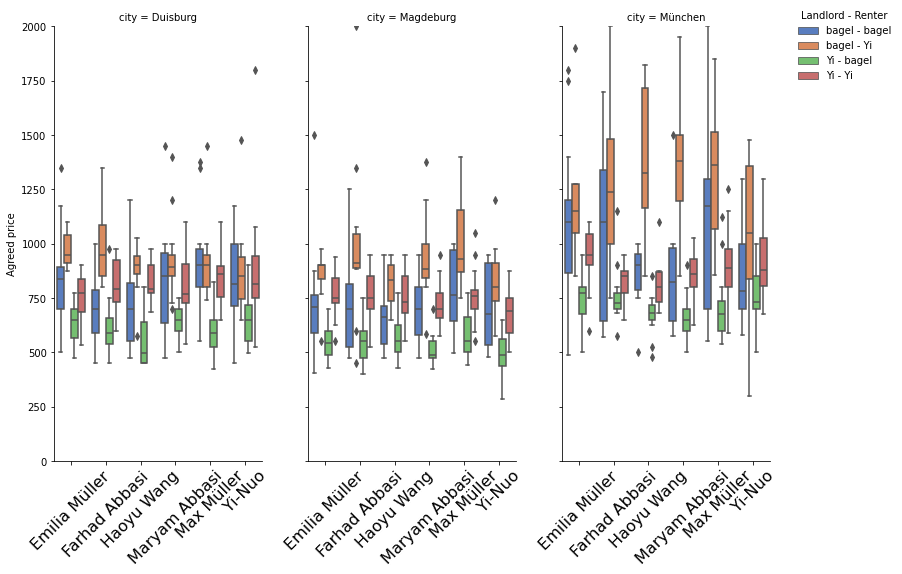

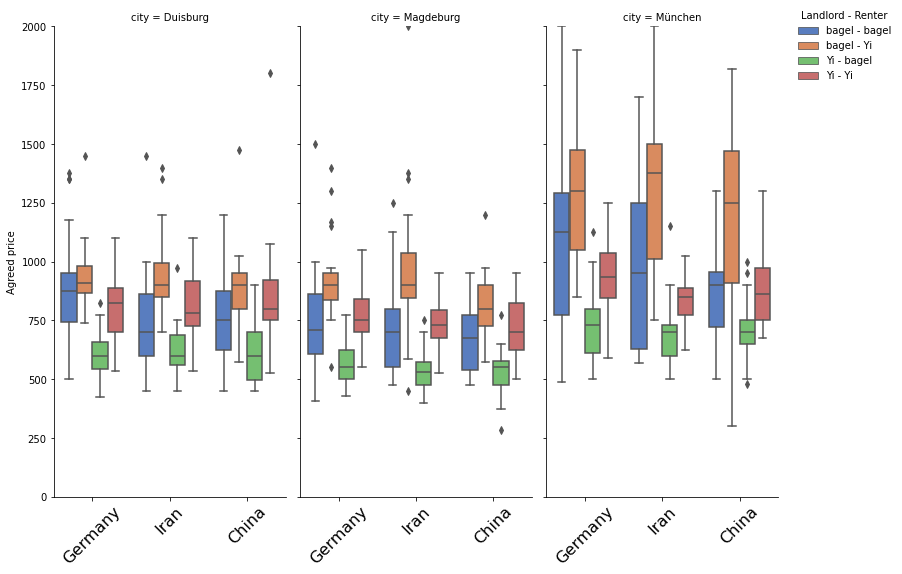

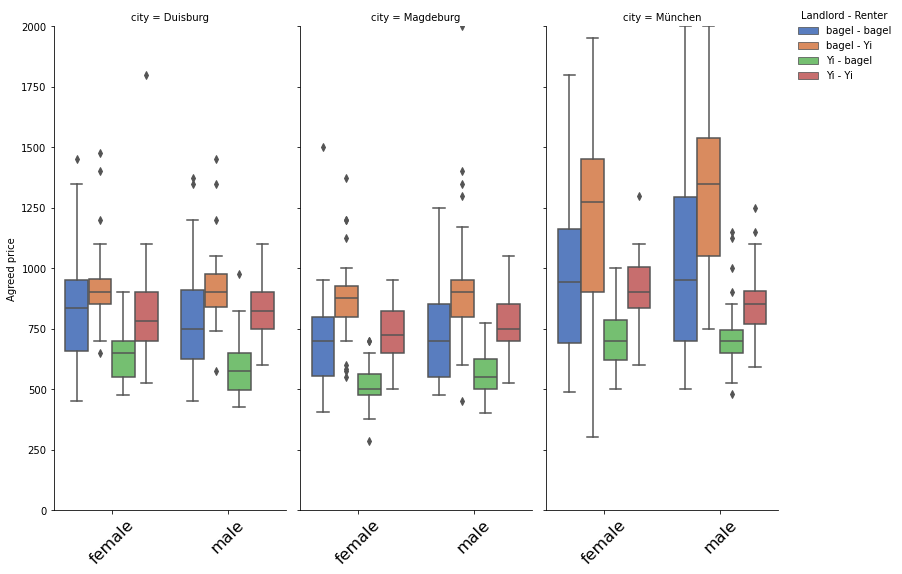

In [48]:
for var in ["answer_name", "country", "gender"]:
    city_model_box_i = sns.catplot(x=var, 
                                 y="answer_price_n", 
                                 hue="cross_model", 
                                 col="city", 
                                 kind="box", 
                                 data=combined_df[(combined_df["answer_agreement_n"] == 1) &
                                                  (combined_df["answer_name"] != "Peter Schmidt") &
                                                  (combined_df["interview_partner"] == "renter")],
                                 col_wrap=3,
                                 palette="muted",
                                 height=8,
                                 aspect=0.4,
                                 legend_out=True,
                                 )

    city_model_box_i.set(ylim = (0,2000), ylabel=("Agreed price"))

    for ax in city_model_box_i.axes.flat:
        ax.tick_params(axis='x', labelrotation=45, labelsize=16)
        ax.set_xlabel("")

    sns.move_legend(city_model_box_i, "upper left", bbox_to_anchor=(1, 1), title="Landlord - Renter")
    # plt.suptitle("Average discussed prices by name")
    
    plt.tight_layout()
    plt.savefig(f"agreed_prices{var}.png", bbox_inches='tight')


    plt.show()

### Likability

In [49]:
combined_df["answer_likability_n"].value_counts()

7.0     1034
8.0      798
10.0     426
9.0      275
5.0      117
1.0      109
6.0       43
3.0        9
2.0        6
Name: answer_likability_n, dtype: int64

In [50]:
combined_df.groupby("answer_agreement_n")["answer_likability_n"].mean()

answer_agreement_n
0.0    6.748894
1.0    8.008457
Name: answer_likability_n, dtype: float64

In [51]:
combined_df["answer_likability"].value_counts()

7.0       1034
8.0        798
Null       643
10.0       426
9.0        275
5.0        117
1.0        109
6.0         43
3.0          9
2.0          6
600.0        4
700.0        4
650.0        3
900.0        3
1425.0       2
575.0        2
800.0        2
625.0        1
710.0        1
950.0        1
495.0        1
975.0        1
850.0        1
925.0        1
875.0        1
720.0        1
825.0        1
1450.0       1
1000.0       1
1750.0       1
1350.0       1
690.0        1
595.0        1
987.0        1
750.0        1
1200.0       1
Name: answer_likability, dtype: int64

In [52]:
combined_df_agr = combined_df[combined_df["answer_likability"] != "Null"]

In [53]:
combined_df_agr["answer_likability"]

0       10.0
1       10.0
2        8.0
3        9.0
4        7.0
        ... 
3494    10.0
3495     9.0
3496     8.0
3497     7.0
3498     8.0
Name: answer_likability, Length: 2856, dtype: object

In [54]:
likability_grouped = combined_df.groupby(["answer_agreement_n", "cross_model"])["answer_likability_n"].mean()

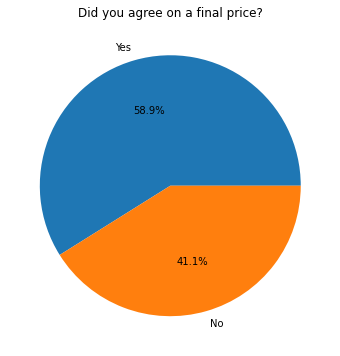

In [55]:
plt.figure(figsize=(6,6))

combined_df["answer_agreement_n"].value_counts().plot(kind="pie", labels=["Yes", "No"], autopct='%1.1f%%')
plt.ylabel("")
plt.title("Did you agree on a final price?")
plt.show()

In [56]:
combined_df[combined_df["answer_agreement_n"] == 1]["answer_price_n"].isna().sum()

184

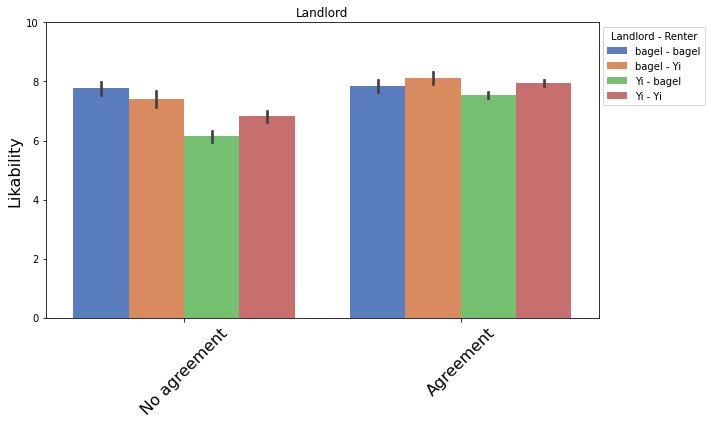

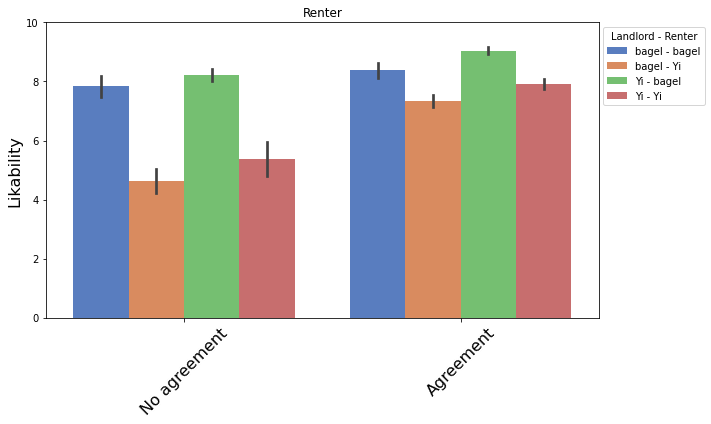

In [57]:
for i, n in enumerate(("landlord", "renter")): 
    plt.figure(figsize=(10, 6))

    likability_bar = sns.barplot(x="answer_agreement_n", 
                                 y="answer_likability_n", 
                                 hue="cross_model", 
                                 data=combined_df[combined_df["interview_partner"] == n],
                                 palette="muted")

    likability_bar.set(ylim=(0, 10))
    likability_bar.set_ylabel("Likability", fontsize=16)
    likability_bar.set_title(n.capitalize())

    # Set tick rotation, xlabel, and title directly on the single Axes object
    likability_bar.set_xticklabels(["No agreement", "Agreement"], fontsize=16, rotation=45)
    likability_bar.set_xlabel("")

    sns.move_legend(likability_bar, "upper right", bbox_to_anchor=(1.2,1), title="Landlord - Renter")
    # plt.suptitle("Average discussed prices by name")

    plt.tight_layout()
    plt.savefig(f"{n}_likability_bar.png", bbox_inches='tight')


    plt.show()

In [58]:
likability_grouped_names = combined_df.groupby(["country", "answer_agreement_n", "cross_model"])["answer_likability_n"].mean()

In [59]:
combined_df[combined_df["interview_partner"]=="renter"].groupby("cross_model")["answer_likability_n"].mean()

cross_model
Yi - Yi          7.423559
Yi - bagel       8.736702
bagel - Yi       6.226064
bagel - bagel    8.147493
Name: answer_likability_n, dtype: float64

In [60]:
def agree_lika(interview_partner):
    for var in ["country", "answer_name", "city", "gender"]:

        plt.figure(figsize=(12, 6))
        
        data= combined_df[combined_df["interview_partner"] == interview_partner]
        if interview_partner == "renter":
            data = data[data["answer_name"] != "Peter Schmidt"]

        plot = sns.catplot(x=var, 
                           y="answer_likability_n", 
                           hue="cross_model", 
                           col="answer_agreement_n", 
                           kind="bar", 
                           data=data,
                           col_wrap=3,
                           palette="muted",
                           height=5,
                           aspect=0.8)

        plot.set(ylim=(0, 10), ylabel="Likability")

        for ax, title in zip(plot.axes.flat, ["No agreement", "Agreement"]):
            ax.tick_params(axis='x', labelrotation=45)
            ax.set_xlabel("")
            ax.set_title(title)

        sns.move_legend(plot, "upper right", bbox_to_anchor=(0.8, 1), title="Landlord - Renter")

        # Perform ANOVA
        grouped_data = combined_df.groupby([var, "cross_model", "answer_agreement_n"])["answer_likability_n"]
        anova_result = stats.f_oneway(*[group for name, group in grouped_data])

        print("ANOVA Results:")
        print(anova_result)

        plt.tight_layout()
        plt.savefig(f"{interview_partner}_likability_bar_{var}.png", bbox_inches='tight')
        plt.show()


In [61]:
combined_df[combined_df["interview_partner"] == "renter"]["answer_likability"].value_counts()

7.0       478
8.0       349
10.0      337
Null      292
9.0       144
1.0        91
5.0        63
6.0        20
2.0         4
3.0         4
600.0       2
690.0       1
650.0       1
900.0       1
925.0       1
1425.0      1
850.0       1
495.0       1
950.0       1
710.0       1
700.0       1
575.0       1
625.0       1
1200.0      1
Name: answer_likability, dtype: int64

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

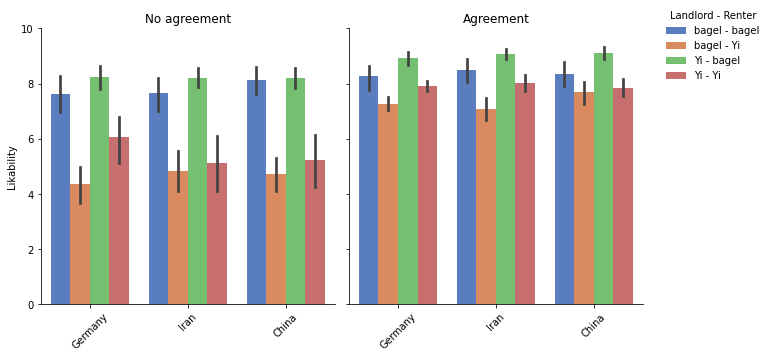

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

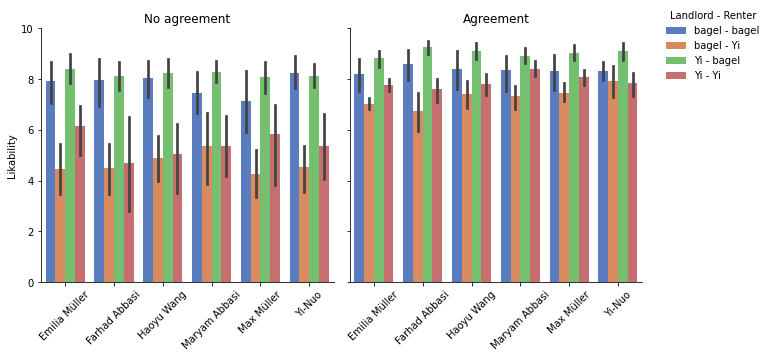

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

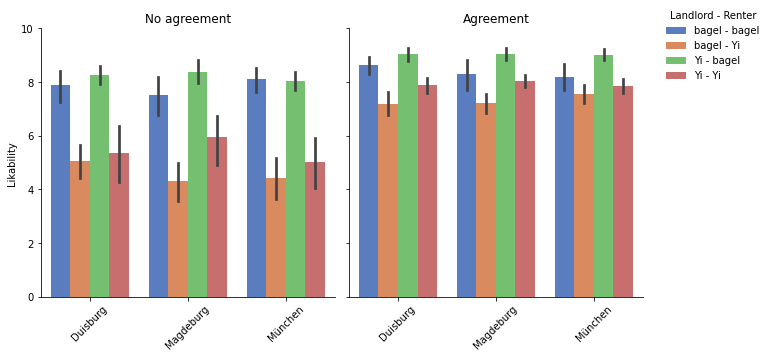

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

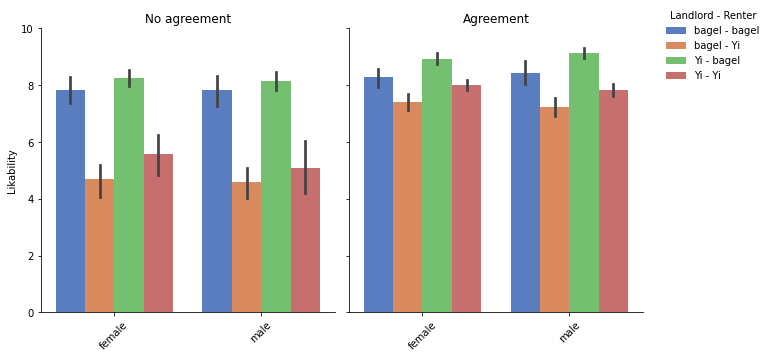

In [62]:
agree_lika("renter")

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

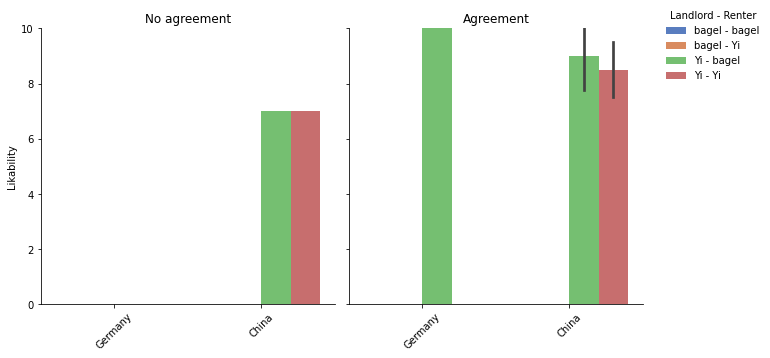

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

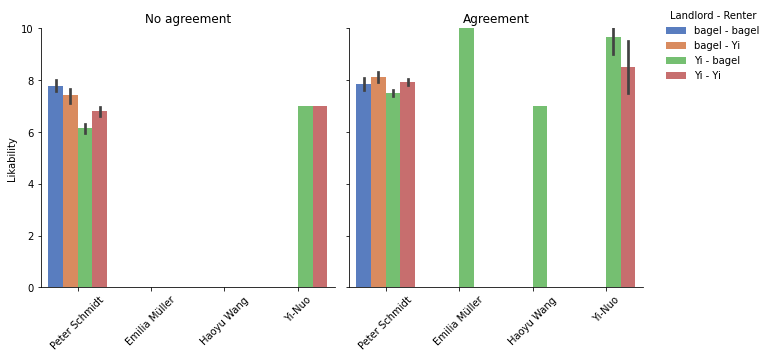

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

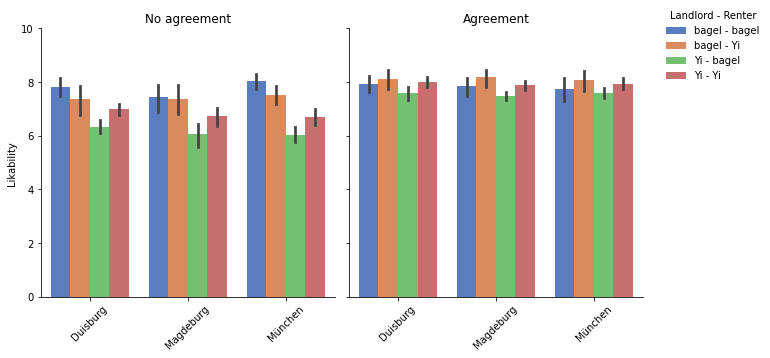

ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)


<Figure size 864x432 with 0 Axes>

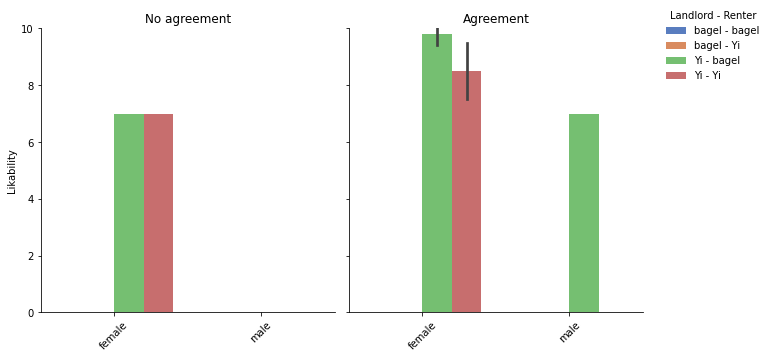

In [63]:
agree_lika("landlord")

In [64]:
landlord_df = combined_df[(combined_df["interview_partner"] == "landlord") &
                          (combined_df["answer_name"] == "Peter Schmidt")]
landlord_df.head()

,Unnamed: 0,answer_name,answer_agreement,answer_price,answer_likability,answer_discrimination,answer_text_discrimination,city,model_landlord,model_renter,...,interview_partner,answer_conversation_partner,correct_character,cross_model,country,gender,answer_agreement_n,answer_price_n,answer_likability_n,answer_discrimination_n
0,0,Peter Schmidt,Yes,740,10.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,...,landlord,Emilia Müller,1.0,bagel - bagel,NaN,NaN,1.0,740.0,10.0,0.0
2,2,Peter Schmidt,Yes,875,8.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,...,landlord,Emilia Müller,1.0,bagel - bagel,NaN,NaN,1.0,875.0,8.0,0.0
4,4,Peter Schmidt,Yes,900,7.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,...,landlord,Emilia Müller,1.0,bagel - bagel,NaN,NaN,1.0,900.0,7.0,0.0
6,6,Peter Schmidt,No,Null,Null,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,...,landlord,Emilia Müller,1.0,bagel - bagel,NaN,NaN,0.0,NaN,NaN,0.0
8,8,Peter Schmidt,No,1400,7.0,No,NaN,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,...,landlord,Emilia Müller,1.0,bagel - bagel,NaN,NaN,0.0,1400.0,7.0,0.0


In [65]:
a = [1,2,3,4,5]
names

{'Farhad Abbasi': ['Iran', 'male'],
 'Maryam Abbasi': ['Iran', 'female'],
 'Haoyu Wang': ['China', 'male'],
 'Yi-Nuo': ['China', 'female'],
 'Max Müller': ['Germany', 'male'],
 'Emilia Müller': ['Germany', 'female'],
 'Peter Schmidt': [nan, nan]}

### landlord likability ratings to the renters

<Figure size 864x432 with 0 Axes>

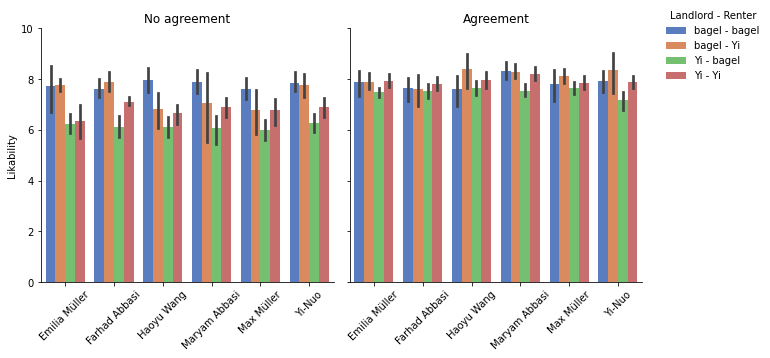

In [66]:
plt.figure(figsize=(12, 6))

data= combined_df[(combined_df["interview_partner"] == "landlord") &
                  (combined_df["answer_name"] == "Peter Schmidt") &
                  (~combined_df["answer_conversation_partner"].isin(["Peter Schmidt", "Null"]))]

plot = sns.catplot(x="answer_conversation_partner", 
                   y="answer_likability_n", 
                   hue="cross_model", 
                   col="answer_agreement_n", 
                   kind="bar", 
                   data=data,
                   col_wrap=3,
                   palette="muted",
                   height=5,
                   aspect=0.8)

plot.set(ylim=(0, 10), ylabel="Likability")

for ax, title in zip(plot.axes.flat, ["No agreement", "Agreement"]):
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel("")
    ax.set_title(title)

sns.move_legend(plot, "upper right", bbox_to_anchor=(0.8, 1), title="Landlord - Renter")

plt.tight_layout()
plt.savefig(f"landlord_assigned_likes_bar_{var}.png", bbox_inches='tight')
plt.show()

### Regression: price - likability

In [67]:
def grouped_regression(data, group_var, x_var, y_var, renter):
    data = data[data["answer_agreement_n"] == 1]
    if renter:
        data = data[data["answer_name"] != "Peter Schmidt"]
    else:
        data = data[data["answer_name"] == "Peter Schmidt"]
    # Group data by the specified variable
    grouped_data = data.groupby(group_var)

    # Iterate over groups
    for group_name, group_data in grouped_data:
        # Drop rows with missing values in x_var, y_var, and cross_model
        group_data = group_data.dropna(subset=[x_var, y_var, 'cross_model'])

        # Check for infinity values and replace them with NaNs
        group_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        group_data.dropna(subset=[x_var, y_var], inplace=True)
        
        z_scores = np.abs(stats.zscore(group_data[x_var]))
        group_data = group_data[(z_scores < 3)]  # Adjust threshold as needed
        
        # Plot
        plt.figure(figsize=(10,5))
        for cross_model, subset_data in group_data.groupby('cross_model'):
            X = sm.add_constant(subset_data[[x_var]])  # Add constant term
            y = subset_data[y_var]
            model = sm.OLS(y, X).fit()
            
            # Print summary of regression results
            print(f"Regression results for {group_name, cross_model}:")
            print(model.summary().tables[1])
            sns.regplot(x=x_var, y=y_var, data=subset_data, scatter=False, label=f'{cross_model}', ci=False)
#             plt.plot(subset_data[x_var], model.predict(X), label="f'Regression Line for {cross_model}'")
#             sns.scatterplot(x=x_var, y=y_var, data=subset_data)
            
        plt.title(f"Regression Plot for {group_name}")
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.legend()
        plt.show()

#### Renters

Regression results for ('Duisburg', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.9631      1.035      7.692      0.000       5.905      10.021
answer_price_n    -0.0001      0.001     -0.110      0.913      -0.003       0.002
Regression results for ('Duisburg', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.1020      0.634     15.946      0.000       8.843      11.361
answer_price_n    -0.0017      0.001     -1.677      0.097      -0.004       0.000
Regression results for ('Duisburg', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3

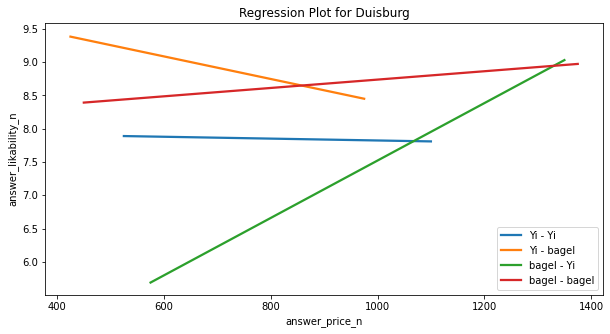

Regression results for ('Magdeburg', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7449      0.829      9.346      0.000       6.101       9.389
answer_price_n     0.0004      0.001      0.335      0.738      -0.002       0.003
Regression results for ('Magdeburg', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.3899      0.659     15.778      0.000       9.082      11.698
answer_price_n    -0.0024      0.001     -2.023      0.046      -0.005   -4.28e-05
Regression results for ('Magdeburg', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

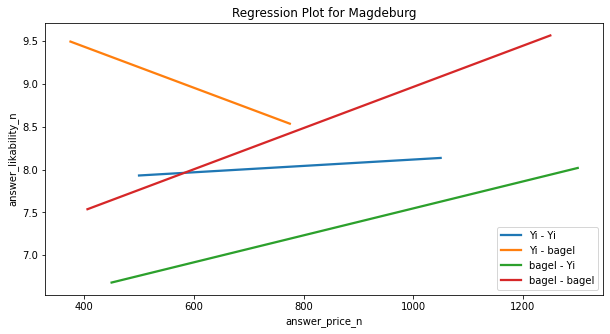

Regression results for ('München', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8801      1.013      8.763      0.000       6.858      10.902
answer_price_n    -0.0011      0.001     -0.980      0.331      -0.003       0.001
Regression results for ('München', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.2665      0.587     15.787      0.000       8.098      10.435
answer_price_n    -0.0004      0.001     -0.440      0.661      -0.002       0.001
Regression results for ('München', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.10

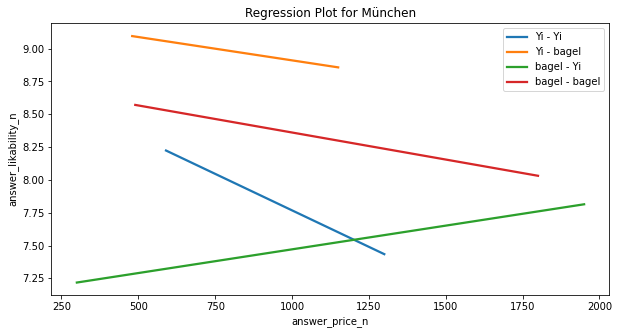

In [68]:
grouped_regression(combined_df, "city", "answer_price_n", "answer_likability_n", 1)

#### Landlord

Regression results for ('Duisburg', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4808      0.748     11.343      0.000       6.994       9.967
answer_price_n    -0.0006      0.001     -0.668      0.506      -0.002       0.001
Regression results for ('Duisburg', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7581      0.709     10.944      0.000       6.348       9.168
answer_price_n    -0.0004      0.001     -0.319      0.750      -0.003       0.002
Regression results for ('Duisburg', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7

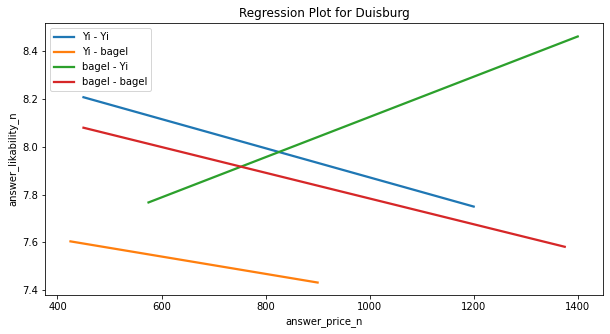

Regression results for ('Magdeburg', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.2526      0.698     11.816      0.000       6.866       9.639
answer_price_n    -0.0005      0.001     -0.561      0.576      -0.002       0.001
Regression results for ('Magdeburg', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.1199      0.429     18.917      0.000       7.268       8.972
answer_price_n    -0.0013      0.001     -1.732      0.087      -0.003       0.000
Regression results for ('Magdeburg', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

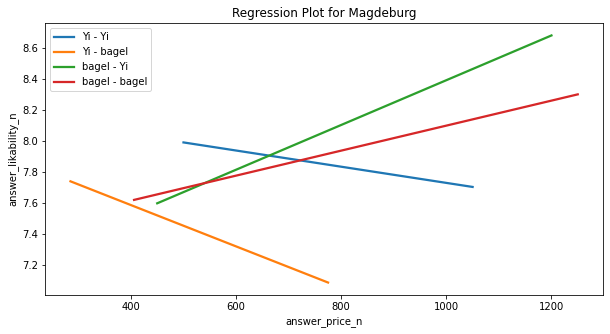

Regression results for ('München', 'Yi - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3452      0.583     16.030      0.000       8.176      10.514
answer_price_n    -0.0016      0.001     -2.447      0.018      -0.003      -0.000
Regression results for ('München', 'Yi - bagel'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3692      0.511     16.383      0.000       7.354       9.384
answer_price_n    -0.0011      0.001     -1.559      0.123      -0.002       0.000
Regression results for ('München', 'bagel - Yi'):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.57

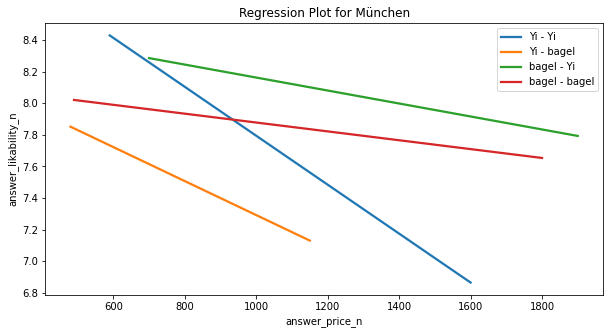

In [69]:
grouped_regression(combined_df, "city", "answer_price_n", "answer_likability_n", 0)

# Statistical analysis

In [70]:
def anova_and_posthoc(data, ind_var, dep_var, name):
    
    for cross_model in df_all["cross_model"].unique():
        # Exclude NaN values
        filtered_data = data[data["cross_model"] == cross_model].dropna(subset=[ind_var, dep_var])

        # Group by and perform ANOVA
        grouped_data = filtered_data.groupby(ind_var)[dep_var]

        anova_result = stats.f_oneway(*[group for name, group in grouped_data])
        print("-"*10, cross_model, "-"*10)
        print("ANOVA Result:")
        print(anova_result)

        # Post-hoc test
        posthoc = pairwise_tukeyhsd(filtered_data[dep_var], filtered_data[ind_var])
        print(f"\nPost-hoc Test Results for {ind_var}:")
        print(posthoc)

### Average Prices (conversation data)

In [71]:
for var in ["name", "country", "city", "gender"]:
    anova_and_posthoc(df_all_renter, var, "Avg Price", "name")

---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=1.9996213087512333, pvalue=0.07815838086951316)

Post-hoc Test Results for name:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
Emilia Müller Farhad Abbasi  -99.9836 0.4389 -255.3754  55.4081  False
Emilia Müller    Haoyu Wang    -84.53 0.6405 -242.1374  73.0773  False
Emilia Müller Maryam Abbasi  -42.2237 0.9693 -195.5941 111.1466  False
Emilia Müller    Max Müller -121.2294 0.2154 -275.2536  32.7948  False
Emilia Müller        Yi-Nuo    9.6318    1.0 -143.7385 163.0022  False
Farhad Abbasi    Haoyu Wang   15.4536 0.9998 -144.7294 175.6366  False
Farhad Abbasi Maryam Abbasi   57.7599 0.8964  -98.2561 213.7759  False
Farhad Abbasi    Max Müller  -21.2458 0.9988 -177.9046  135.413  False
Farhad Abbasi        Yi-Nuo  109.6154 0.3367  -46.4006 265.6314


Post-hoc Test Results for city:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
 Duisburg Magdeburg -69.3106 0.1502 -156.7391   18.118  False
 Duisburg   München 155.7446 0.0001   70.2455 241.2437   True
Magdeburg   München 225.0552    0.0  137.4534 312.6571   True
-------------------------------------------------------------
---------- bagel - Yi ----------
ANOVA Result:
F_onewayResult(statistic=42.37771645335269, pvalue=2.3437038817065394e-17)

Post-hoc Test Results for city:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
 Duisburg Magdeburg -87.5438 0.0779 -182.5067    7.419  False
 Duisburg   München 273.9845    0.0  179.0217 368.9474   True
Magdeburg   München 361.5283   -0.0  264.9421 458.1146   True
------

### Agreed price (interview data)

In [72]:
# create df without landlord Peter Schmidt
combined_df_renter = combined_df[combined_df["interview_partner"] == "renter"] 
combined_df_landlord = combined_df[combined_df["interview_partner"] == "landlord"] 


In [73]:
for var in ["answer_name", "country", "city", "gender"]:
    anova_and_posthoc(combined_df_renter, var, "answer_price_n", "answer_name")

---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=2.327811117800927, pvalue=0.04295238119917255)

Post-hoc Test Results for answer_name:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
Emilia Müller Farhad Abbasi  -88.3615 0.6636 -257.2482  80.5252  False
Emilia Müller    Haoyu Wang -136.4489 0.2256 -311.7281  38.8304  False
Emilia Müller Maryam Abbasi -122.2411 0.3582 -299.6843  55.2022  False
Emilia Müller    Max Müller   19.6973 0.9994 -149.1894  188.584  False
Emilia Müller        Yi-Nuo  -94.2908 0.6245 -267.5705   78.989  False
Farhad Abbasi    Haoyu Wang  -48.0873 0.9676 -220.8834 124.7087  False
Farhad Abbasi Maryam Abbasi  -33.8796 0.9937 -208.8704 141.1113  False
Farhad Abbasi    Max Müller  108.0588 0.4262  -58.2493 274.3669  False
Farhad Abbasi        Yi-Nuo   -5.9292    1.0 -176.6968 16


Post-hoc Test Results for country:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
  China Germany   0.8219 0.9989 -43.1772  44.821  False
  China    Iran -16.2375 0.6595 -60.1521 27.6771  False
Germany    Iran -17.0594 0.6218 -60.2392 26.1204  False
-------------------------------------------------------
---------- Yi - Yi ----------
ANOVA Result:
F_onewayResult(statistic=1.0893129761174503, pvalue=0.3378792179413988)

Post-hoc Test Results for country:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
  China Germany  19.8124 0.6487 -32.7968 72.4217  False
  China    Iran -11.9944  0.851  -64.215 40.2262  False
Germany    Iran -31.8069 0.3099 -83.0038   19.39  False
-------------------------------------------------------
---------- bagel - bagel ---

### Likability (interview data)

### Renters

In [74]:
for var in ["answer_name", "answer_agreement_n", "country", "city", "gender"]:
    anova_and_posthoc(combined_df_renter, var, "answer_likability_n", "answer_name")

---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=0.5985555762084185, pvalue=0.7010964322406521)

Post-hoc Test Results for answer_name:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Emilia Müller Farhad Abbasi   0.2833 0.9732 -0.7785 1.3452  False
Emilia Müller    Haoyu Wang   0.0724    1.0 -0.9986 1.1434  False
Emilia Müller Maryam Abbasi  -0.2964 0.9697 -1.3771 0.7842  False
Emilia Müller    Max Müller  -0.0434    1.0 -1.1398  1.053  False
Emilia Müller        Yi-Nuo   0.2333 0.9907 -0.8744 1.3411  False
Farhad Abbasi    Haoyu Wang  -0.2109 0.9932 -1.2819 0.8601  False
Farhad Abbasi Maryam Abbasi  -0.5798 0.6401 -1.6604 0.5009  False
Farhad Abbasi    Max Müller  -0.3267 0.9568 -1.4231 0.7697  False
Farhad Abbasi        Yi-Nuo    -0.05    1.0 -1.1577 1.0577  False
   Haoyu Wang Maryam Abbasi  -0.3688  0.927 -1

---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=0.22250968973337087, pvalue=0.8006254632126969)

Post-hoc Test Results for country:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  China Germany  -0.1681 0.8107 -0.8089 0.4728  False
  China    Iran  -0.1443  0.855  -0.781 0.4925  False
Germany    Iran   0.0238 0.9957 -0.6071 0.6547  False
-----------------------------------------------------
---------- bagel - Yi ----------
ANOVA Result:
F_onewayResult(statistic=0.15635566333424347, pvalue=0.855312680430964)

Post-hoc Test Results for country:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  China Germany   -0.112 0.9312 -0.8454 0.6213  False
  China    Iran   0.0619 0.9784 -0.6699 0.7937  False
Germany    Iran   0.1739 0.8457 -0.568

### Landlord

In [75]:
combined_df_landlord['renter_country'] = combined_df_landlord['answer_conversation_partner'].map(names_df['Country'])
combined_df_landlord['renter_gender'] = combined_df_landlord['answer_conversation_partner'].map(names_df['Gender'])

In [76]:
for var in ["answer_conversation_partner", "answer_agreement_n", "renter_country", "city", "renter_gender"]:
    anova_and_posthoc(combined_df_landlord, var, "answer_likability_n", "answer_name")

---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=0.7036382582920316, pvalue=0.6211330130663586)

Post-hoc Test Results for answer_conversation_partner:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Emilia Müller Farhad Abbasi  -0.1875 0.9825 -0.9628 0.5878  False
Emilia Müller    Haoyu Wang  -0.0674 0.9999 -0.8471 0.7123  False
Emilia Müller Maryam Abbasi   0.3095 0.8792 -0.4946 1.1136  False
Emilia Müller    Max Müller  -0.0975 0.9991 -0.8532 0.6582  False
Emilia Müller        Yi-Nuo  -0.0897 0.9996 -0.9111 0.7316  False
Farhad Abbasi    Haoyu Wang   0.1201 0.9981 -0.6819 0.9222  False
Farhad Abbasi Maryam Abbasi    0.497  0.515 -0.3288 1.3228  False
Farhad Abbasi    Max Müller     0.09 0.9995 -0.6887 0.8688  False
Farhad Abbasi        Yi-Nuo   0.0978 0.9995 -0.7448 0.9403  False
   Haoyu Wang Maryam Abbasi   


Post-hoc Test Results for answer_agreement_n:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
   0.0    1.0   1.1281  -0.0 0.8942 1.362   True
------------------------------------------------
---------- bagel - bagel ----------
ANOVA Result:
F_onewayResult(statistic=0.19594974978391883, pvalue=0.8221661725697702)

Post-hoc Test Results for renter_country:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  China Germany   0.0292  0.988 -0.4356 0.4941  False
  China    Iran    0.122 0.8236  -0.362  0.606  False
Germany    Iran   0.0927 0.8827 -0.3663 0.5518  False
-----------------------------------------------------
---------- bagel - Yi ----------
ANOVA Result:
F_onewayResult(statistic=0.2917089389023016, pvalue=0.7472219168065053)

Post-hoc Test Results for renter_country:

In [77]:
combined_df_landlord.groupby(["cross_model", "renter_gender"])["answer_likability_n"].mean()

cross_model    renter_gender
Yi - Yi        female           7.806630
               male             7.645714
Yi - bagel     female           7.000000
               male             7.185000
bagel - Yi     female           7.816176
               male             7.389706
bagel - bagel  female           7.903704
               male             7.716216
Name: answer_likability_n, dtype: float64